# Car Price Prediction Project

### Problem statement
With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

I have scraped the data from the well known e-commerce website cardekho.com; where I find some more features of cars to fetch than other sites. As per the requirement of our client we need to build the model to predict the prices of these used cars. In this project I will build various machine learning models sand will check the performance of each and every model. Based on our evaluations finally we will select the best machine learning model.


In [1]:
# data processing
import pandas as pd
# linear algebra
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#scaling
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [2]:
df = pd.read_csv("Cardekho_UsedCars.csv")
df

,Unnamed: 0,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,...,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,0,2012 Maruti Alto K10,Petrol,"89,579 kms",998,Manual,20.92 kmpl,5,White,67.1,...,Drum,NaN,1460,1475,3620,1185,8,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh
1,1,2016 Maruti Wagon R,Petrol,"81,674 kms",998,Manual,21.79 kmpl,5,White,67.05,...,Drum,341 Litres,1675,1620,3655,1340,9,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh
2,2,2011 Honda City,Petrol,"38,647 kms",1497,Manual,17 kmpl,5,Other,115.64,...,Drum,506 litres,1480,1695,4420,-,8.5,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh
3,3,2019 Maruti Swift Dzire,Petrol,"9,718 kms",1197,Manual,21.21 kmpl,5,White,81.8,...,Drum,378,1515,1735,3995,1315Kg,10,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh
4,4,2012 Maruti Eeco,Petrol,"57,341 kms",1196,Manual,16.11 kmpl,5,White,72.42,...,Drum,540,1825,1475,3675,1510,-,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,11159,2013 Mahindra Scorpio,Diesel,"79,000 kms",2523,Manual,14.0 kmpl,9,White,75,...,Drum,-,1916,1817,4430,2510,-,-,https://www.cardekho.com/used-cars+in+pune,5.8 Lakh
11160,11160,2009 Mercedes-Benz New C-Class,Petrol,"84,000 kms",1796,Manual,11.74 kmpl,5,Grey,186,...,Solid Disc,-,1447,1770,4591,2020,-,230km/hr,https://www.cardekho.com/used-cars+in+pune,5.5 Lakh
11161,11161,2018 Maruti Swift Dzire Tour,Petrol,"41,210 kms",1197,Manual,19.0 kmpl,5,Grey,85.8,...,Drum,-,-,-,-,-,-,169 kmph,https://www.cardekho.com/used-cars+in+pune,6.7 Lakh
11162,11162,2017 Honda WR-V,Diesel,"17,000 kms",1498,Manual,25.5 kmpl,5,Premium Amber Metal,98.6,...,Drum,-,1601,1734,3999,-,-,176 kmph,https://www.cardekho.com/used-cars+in+pune,8.75 Lakh


### Feature Information
Car_Name  :  Name of the car with Year

Fuel_type  :  Type of fuel used for car engine 

Running_in_kms  :  Car running in kms till the date

Endine_disp  :  Engine displacement/engine CC

Gear_transmission  :  Type of gear transmission used in car

Milage_in_km/ltr  :  Overall milage of car in Km/ltr

Seating_cap  :  Availability of number of seats in the car

color : Car color

Max_power : Maximum power of engine used in car in bhp

front_brake_type  :  type of brake system used for front-side wheels

rear_brake_type  :  type of brake system used for back-side wheels

cargo_volume  :  the total cubic feet of space in a car's cargo area.

height  :  Total height of car in mm

width  :  Width of car in mm

length  :  TOtal length of the car in mm

Weight  :  Gross weight of the car in kg

Insp_score  :  inspection rating out of 10

top_speed  :  Maximum speed limit of the car in km per hours

City_url  :  Url of the page of cars from a particular city

Car_price  :  Price of the car

In [3]:
#check for duplicates
df.duplicated().sum()

0

In [4]:
#lets check missing data
df.isnull().sum()

Unnamed: 0             0
Car_Name               0
Fuel_type              0
Running_in_kms         0
Endine_disp            0
Gear_transmission      0
Milage_in_km/ltr       0
Seating_cap           31
color                  0
Max_power              5
front_brake_type      41
rear_brake_type       41
cargo_volume         156
height                31
width                 31
length                31
Weight                23
Insp_score             0
top_speed            951
City_url               0
Car_price              0
dtype: int64

We can observe many null values are presents in our data. Instead of these null values there are some more values in our data set with '-' mark as well as with text 'null '. we will treat them as null values

In [5]:
df.replace('-',np.nan, inplace = True)
df.replace('null ',np.nan, inplace = True)

In [6]:
df.isnull().sum()

Unnamed: 0              0
Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp           495
Gear_transmission       0
Milage_in_km/ltr      452
Seating_cap           511
color                1047
Max_power             612
front_brake_type      657
rear_brake_type       657
cargo_volume         9058
height                688
width                 689
length                688
Weight               5618
Insp_score           9717
top_speed            4064
City_url                0
Car_price               0
dtype: int64

<AxesSubplot:>

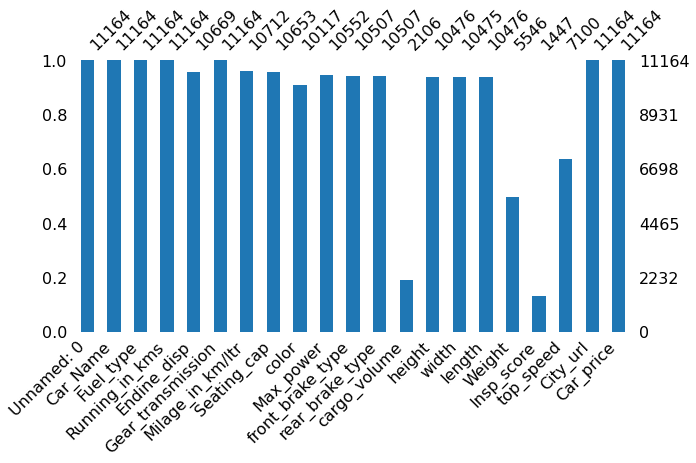

In [7]:
missingno.bar(df, figsize = (10,5), color="tab:blue")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11164 entries, 0 to 11163
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         11164 non-null  int64 
 1   Car_Name           11164 non-null  object
 2   Fuel_type          11164 non-null  object
 3   Running_in_kms     11164 non-null  object
 4   Endine_disp        10669 non-null  object
 5   Gear_transmission  11164 non-null  object
 6   Milage_in_km/ltr   10712 non-null  object
 7   Seating_cap        10653 non-null  object
 8   color              10117 non-null  object
 9   Max_power          10552 non-null  object
 10  front_brake_type   10507 non-null  object
 11  rear_brake_type    10507 non-null  object
 12  cargo_volume       2106 non-null   object
 13  height             10476 non-null  object
 14  width              10475 non-null  object
 15  length             10476 non-null  object
 16  Weight             5546 non-null   objec

As the columns cargo_volume and Insp_score are having more than 80% null values; I decided to drop these columns

In [9]:
df.drop(columns = ['cargo_volume','Insp_score'], inplace = True)

In [10]:
#the column Unnamed: 0 is having only index, which is not required for prediction, I will drop it
df.drop(columns = 'Unnamed: 0', inplace = True)

I have observed lot of null values from same rows in my data, which may give us trouble in model building, so I will drop some data where column color is having null values, by which we will lose arround 1047 entries but it will lead to a better model.

In [11]:
df.dropna(subset = ['color'], inplace = True)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [12]:
#lets check the null values again
df.isnull().sum()

Car_Name                0
Fuel_type               0
Running_in_kms          0
Endine_disp            39
Gear_transmission       0
Milage_in_km/ltr        1
Seating_cap            56
color                   0
Max_power             140
front_brake_type      184
rear_brake_type       184
height                212
width                 213
length                212
Weight               4875
top_speed            3420
City_url                0
Car_price               0
dtype: int64

Great we have reduced percentage of null values to the better extent, still columns like Weight and top_spped are having huge number of missing values we will replace them by appropriate action.

In [13]:
#Lets have a look at our data set now
df

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price
0,2012 Maruti Alto K10,Petrol,"89,579 kms",998,Manual,20.92 kmpl,5,White,67.1,Ventilated Disc,Drum,1460,1475,3620,1185,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh
1,2016 Maruti Wagon R,Petrol,"81,674 kms",998,Manual,21.79 kmpl,5,White,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh
2,2011 Honda City,Petrol,"38,647 kms",1497,Manual,17 kmpl,5,Other,115.64,Disc,Drum,1480,1695,4420,NaN,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh
3,2019 Maruti Swift Dzire,Petrol,"9,718 kms",1197,Manual,21.21 kmpl,5,White,81.8,Disc,Drum,1515,1735,3995,1315Kg,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh
4,2012 Maruti Eeco,Petrol,"57,341 kms",1196,Manual,16.11 kmpl,5,White,72.42,Disc,Drum,1825,1475,3675,1510,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10112,2013 Mahindra Scorpio,Diesel,"79,000 kms",2523,Manual,14.0 kmpl,9,White,75,Disc,Drum,1916,1817,4430,2510,NaN,https://www.cardekho.com/used-cars+in+pune,5.8 Lakh
10113,2009 Mercedes-Benz New C-Class,Petrol,"84,000 kms",1796,Manual,11.74 kmpl,5,Grey,186,Ventilated Disc,Solid Disc,1447,1770,4591,2020,230km/hr,https://www.cardekho.com/used-cars+in+pune,5.5 Lakh
10114,2018 Maruti Swift Dzire Tour,Petrol,"41,210 kms",1197,Manual,19.0 kmpl,5,Grey,85.8,Ventilated Disc,Drum,NaN,NaN,NaN,NaN,169 kmph,https://www.cardekho.com/used-cars+in+pune,6.7 Lakh
10115,2017 Honda WR-V,Diesel,"17,000 kms",1498,Manual,25.5 kmpl,5,Premium Amber Metal,98.6,Ventilated Disc,Drum,1601,1734,3999,NaN,176 kmph,https://www.cardekho.com/used-cars+in+pune,8.75 Lakh


## Data-Processing

Looking at our data we can say that we need to go through lot of data-processing steps, because our data is in row format.

### Car_Name

As the column ‘Car_Name’ is containing the make year, Brand name as well as the model of the car; I will create three different columns for these respective features by using ‘Car_Name’

In [14]:
df['Make_year'] = df['Car_Name'].str[0:4]
df['car_names'] = df['Car_Name'].str[4:]
df.drop(columns = 'Car_Name', inplace = True)

In [15]:
df['Brand'] = df.car_names.str.split(' ').str.get(1)
df['Model'] = df.car_names.str.split(' ').str[2:]
df['Model'] = df['Model'].apply(lambda x: ','.join(map(str, x)))
df['Model'] = df['Model'].str.replace(',',' ')
df.drop(columns = 'car_names', inplace = True)

In [16]:
#lets check the data set now
df.head()

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,City_url,Car_price,Make_year,Brand,Model
0,Petrol,"89,579 kms",998,Manual,20.92 kmpl,5,White,67.1,Ventilated Disc,Drum,1460,1475,3620,1185,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,2012,Maruti,Alto K10
1,Petrol,"81,674 kms",998,Manual,21.79 kmpl,5,White,67.05,Disc,Drum,1675,1620,3655,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,2016,Maruti,Wagon R
2,Petrol,"38,647 kms",1497,Manual,17 kmpl,5,Other,115.64,Disc,Drum,1480,1695,4420,NaN,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,2011,Honda,City
3,Petrol,"9,718 kms",1197,Manual,21.21 kmpl,5,White,81.8,Disc,Drum,1515,1735,3995,1315Kg,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,2019,Maruti,Swift Dzire
4,Petrol,"57,341 kms",1196,Manual,16.11 kmpl,5,White,72.42,Disc,Drum,1825,1475,3675,1510,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,2012,Maruti,Eeco


### car_price

Our target variable that is car_price should cantain continuous data, but there are some string values like 'Lakh', 'Cr' and ','. I will replace 'Lakh' by 100000 and 'Cr' with 10000000 and comma by empty place. then I will split it into two columns and after that multiply these two columns to get exact car price in numerical format

In [17]:
df['car_price'] = df['Car_price'].str.replace('Lakh','100000')
df['car_price'] = df['car_price'].str.replace(',','')
df['car_price'] = df['car_price'].str.replace('Cr','10000000')

In [18]:
df[['a','b']] = df.car_price.str.split(expand=True)

In [19]:
df['a'] = df['a'].astype('float')
df['b'] = df['b'].astype('float')

In [20]:
df.isnull().sum()

Fuel_type               0
Running_in_kms          0
Endine_disp            39
Gear_transmission       0
Milage_in_km/ltr        1
Seating_cap            56
color                   0
Max_power             140
front_brake_type      184
rear_brake_type       184
height                212
width                 213
length                212
Weight               4875
top_speed            3420
City_url                0
Car_price               0
Make_year               0
Brand                   0
Model                   0
car_price               0
a                       0
b                      83
dtype: int64

In [22]:
df['b']=df['b'].fillna(value = 1)

In [23]:
df['car_price'] = df['a'] * df['b']

In [24]:
df.dtypes

Fuel_type             object
Running_in_kms        object
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
height                object
width                 object
length                object
Weight                object
top_speed             object
City_url              object
Car_price             object
Make_year             object
Brand                 object
Model                 object
car_price            float64
a                    float64
b                    float64
dtype: object

In [25]:
df

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,...,Weight,top_speed,City_url,Car_price,Make_year,Brand,Model,car_price,a,b
0,Petrol,"89,579 kms",998,Manual,20.92 kmpl,5,White,67.1,Ventilated Disc,Drum,...,1185,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,1.77 Lakh,2012,Maruti,Alto K10,177000.0,1.77,100000.0
1,Petrol,"81,674 kms",998,Manual,21.79 kmpl,5,White,67.05,Disc,Drum,...,1340,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.6 Lakh,2016,Maruti,Wagon R,360000.0,3.60,100000.0
2,Petrol,"38,647 kms",1497,Manual,17 kmpl,5,Other,115.64,Disc,Drum,...,NaN,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,3.99 Lakh,2011,Honda,City,399000.0,3.99,100000.0
3,Petrol,"9,718 kms",1197,Manual,21.21 kmpl,5,White,81.8,Disc,Drum,...,1315Kg,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,6.65 Lakh,2019,Maruti,Swift Dzire,665000.0,6.65,100000.0
4,Petrol,"57,341 kms",1196,Manual,16.11 kmpl,5,White,72.42,Disc,Drum,...,1510,NaN,https://www.cardekho.com/used-cars+in+ahmedabad,2.79 Lakh,2012,Maruti,Eeco,279000.0,2.79,100000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10112,Diesel,"79,000 kms",2523,Manual,14.0 kmpl,9,White,75,Disc,Drum,...,2510,NaN,https://www.cardekho.com/used-cars+in+pune,5.8 Lakh,2013,Mahindra,Scorpio,580000.0,5.80,100000.0
10113,Petrol,"84,000 kms",1796,Manual,11.74 kmpl,5,Grey,186,Ventilated Disc,Solid Disc,...,2020,230km/hr,https://www.cardekho.com/used-cars+in+pune,5.5 Lakh,2009,Mercedes-Benz,New C-Class,550000.0,5.50,100000.0
10114,Petrol,"41,210 kms",1197,Manual,19.0 kmpl,5,Grey,85.8,Ventilated Disc,Drum,...,NaN,169 kmph,https://www.cardekho.com/used-cars+in+pune,6.7 Lakh,2018,Maruti,Swift Dzire Tour,670000.0,6.70,100000.0
10115,Diesel,"17,000 kms",1498,Manual,25.5 kmpl,5,Premium Amber Metal,98.6,Ventilated Disc,Drum,...,NaN,176 kmph,https://www.cardekho.com/used-cars+in+pune,8.75 Lakh,2017,Honda,WR-V,875000.0,8.75,100000.0


Great we have got our target variable cleaned now with continuous data. I will drop the unwanted columns which I have created for this purpose.

In [26]:
df.drop(columns = ['Car_price','a','b'], inplace = True)

### Running_in_kms

The column Running_in_kms is having some string values in it, and it should be continuous data, I will remove str values and commas between them and convert it to float data type. 

In [27]:
df['Running_in_kms'] = df['Running_in_kms'].str.replace('kms','')
df['Running_in_kms'] = df['Running_in_kms'].str.replace(',','')
df['Running_in_kms'] = df['Running_in_kms'].astype('float')

### Engine_disp

The column 'Endine_disp' should be continuous so i will convert it to float type

In [28]:
df.Endine_disp = df.Endine_disp.astype('float')

### Milage_in_km/ltr

the column milage is also having some string values in it, I will remove them and the column will be converted into float data type

In [29]:
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('kmpl','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/kg','')
df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].str.replace('km/hr','')

df['Milage_in_km/ltr'] = df['Milage_in_km/ltr'].astype('float')

###### converting the data type of columns height, width and length into float type

In [30]:
df['height'] = df['height'].str.replace(',','')
df['width'] = df['width'].str.replace(',','')
df['length'] = df['length'].str.replace(',','')
df.height = df.height.astype('float')
df.width = df.width.astype('float')
df.length = df.length.astype('float')

### Weight

In [31]:
#getting numerical values from Weight column
df['Weight'] = df['Weight'].str.replace(',','')
df['Weight'] = df['Weight'].str[0:4]

df.Weight = df.Weight.astype('float')

### top_speed

In [32]:
#getting numerical values from top_speed column
df['top_speed'] = df['top_speed'].str[0:3]
df.top_speed = df.top_speed.astype('float')

### City_url 

I will create a column as city_name on the bases of City_url

In [33]:
df.City_url.value_counts()

https://www.cardekho.com/used-cars+in+bangalore    1275
https://www.cardekho.com/used-cars+in+mumbai       1269
https://www.cardekho.com/used-cars+in+chennai      1070
https://www.cardekho.com/used-cars+in+hyderabad    1042
https://www.cardekho.com/used-cars+in+pune          900
https://www.cardekho.com/used-cars+in+delhi-ncr     864
https://www.cardekho.com/used-cars+in+ahmedabad     849
https://www.cardekho.com/used-cars+in+gurgaon       784
https://www.cardekho.com/used-cars+in+noida         670
https://www.cardekho.com/used-cars+in+kolkata       627
https://www.cardekho.com/used-cars+in+jaipur        588
https://www.cardekho.com/used-cars+in+new-delhi     179
Name: City_url, dtype: int64

In [34]:
df['city_name'] = df.City_url.replace('https://www.cardekho.com/used-cars+in+bangalore', 'Bangalore')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+mumbai', 'mumbai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+chennai', 'Chennai')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+hyderabad', 'hyderabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+pune', 'pune')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+delhi-ncr', 'delhi-ncr')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+ahmedabad', 'ahmedabad')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+gurgaon', 'gurgaon')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+noida', 'noida')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+kolkata', 'kolkata')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+jaipur', 'jaipur')
df['city_name'] = df.city_name.replace('https://www.cardekho.com/used-cars+in+new-delhi', 'new-delhi')

In [35]:
df['city_name'].value_counts()

Bangalore    1275
mumbai       1269
Chennai      1070
hyderabad    1042
pune          900
delhi-ncr     864
ahmedabad     849
gurgaon       784
noida         670
kolkata       627
jaipur        588
new-delhi     179
Name: city_name, dtype: int64

As I have derived city names from city urls, i will drop the city_url column

In [36]:
df.drop(columns = 'City_url', inplace = True)

### Seating_cap

In [37]:
#converting Seating_cap to float data type
df.Seating_cap = df.Seating_cap.astype('float')

### Make_year

By using the car make_year I will create a new column named as Car_age which will tell us how old the car is.

In [38]:
df.Make_year = df.Make_year.astype('float')
df['Car_age'] = 2021 - df['Make_year']
df.drop(columns = 'Make_year', inplace = True)

### Max_power

In [39]:
#getting numerical values from column Max_power and converting them to float type
df['Max_power'] = df['Max_power'].str.replace('Bhp ','')

df.Max_power = df.Max_power.astype('float')

In [40]:
#lets check the data type now
df.dtypes

Fuel_type             object
Running_in_kms       float64
Endine_disp          float64
Gear_transmission     object
Milage_in_km/ltr     float64
Seating_cap          float64
color                 object
Max_power            float64
front_brake_type      object
rear_brake_type       object
height               float64
width                float64
length               float64
Weight               float64
top_speed            float64
Brand                 object
Model                 object
car_price            float64
city_name             object
Car_age              float64
dtype: object

## front_brake_type

In [41]:
df['front_brake_type'].value_counts()

Disc                                        5481
Ventilated Disc                             3903
Solid Disc                                   127
Ventilated Discs                             122
Disc & Caliper Type                           63
Disk                                          49
Ventilated DIsc                               36
Ventilated discs                              26
Drum                                          25
Multilateral Disc                             14
Vantilated Disc                               13
Ventilated Disk                               10
Electric Parking Brake                         9
264mm Ventilated discs                         7
Ventillated Discs                              6
Ventlated Disc                                 6
Disc,internally ventilated                     5
Vacuum assisted hydraulic dual circuit w       4
Booster assisted ventilated disc               4
Ventillated Disc                               3
ABS                 

In [42]:
df["front_brake_type"].replace("Solid Disc","Disc",inplace=True)
df["front_brake_type"].replace("Disk","Disc",inplace=True)
df["front_brake_type"].replace("disc","Disc",inplace=True)
df["front_brake_type"].replace("Discs","Disc",inplace=True)

df["front_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated DIsc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Vantilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated Disk","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("264mm Ventilated discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Discs","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventlated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventillated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("ventilated Disc","Ventilated Disc",inplace=True)
df["front_brake_type"].replace("Ventilated disc","Ventilated Disc",inplace=True)


## rear_brake_type

In [43]:
df['rear_brake_type'].value_counts()

Drum                                        7785
Disc                                        1269
Ventilated Disc                              250
Solid Disc                                   218
Leading-Trailing Drum                         98
Disc & Caliper Type                           63
Self-Adjusting Drum                           59
Discs                                         42
Ventilated discs                              22
Ventilated Discs                              20
Disc & Drum                                   14
Ventilated Drum                               14
Drums                                          9
Electric Parking Brake                         9
Self Adjusting Drum                            9
262mm Disc & Drum Combination                  7
Self adjusting Drums                           6
Self Adjusting Drums                           6
Leading & Trailing Drum                        5
Vacuum assisted hydraulic dual circuit w       4
Self adjusting drums

In [44]:
df["rear_brake_type"].replace("Drums","Drum",inplace=True)
df["rear_brake_type"].replace("drum","Drum",inplace=True)

df["rear_brake_type"].replace("Discs","Disc",inplace=True)
df["rear_brake_type"].replace("Disc Brakes","Disc",inplace=True)

df["rear_brake_type"].replace("Ventilated discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventilated Discs","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialted Disc","Ventilated Disc",inplace=True)
df["rear_brake_type"].replace("Ventialte Disc","Ventilated Disc",inplace=True)

df["rear_brake_type"].replace("Leading & Trailing Drum","Leading-Trailing Drum",inplace=True)

df["rear_brake_type"].replace("Self Adjusting Drum","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self Adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting Drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("Self adjusting drums","Self-Adjusting Drum",inplace=True)
df["rear_brake_type"].replace("self adjusting drums","Self-Adjusting Drum",inplace=True)


Great now we have cleaned our as our requirement. I will save this cleaned data into csv file

In [45]:
#saving the cleaned data into csv file
df.to_csv(r"C:\Users\ABHINANDAN\Desktop\Used_cars_data\cleaned_data.csv")

## EDA

In [46]:
#lets describe the data first 
df.describe()

,Running_in_kms,Endine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,car_price,Car_age
count,10117.000000,10078.000000,10116.000000,10061.000000,9977.000000,9905.000000,9904.000000,9905.000000,5242.000000,6697.000000,1.011700e+04,10117.000000
mean,57725.444104,1472.254515,19.278136,5.250770,102.185857,1568.167794,1724.448203,4108.221605,1715.181038,173.848290,8.106850e+05,6.290402
std,39495.138264,518.760522,4.320714,0.752485,45.729119,114.400393,131.694813,412.290094,445.830640,27.019888,1.033043e+06,3.316786
min,472.000000,0.000000,0.000000,2.000000,34.200000,1281.000000,1410.000000,3099.000000,1000.000000,86.000000,4.500000e+04,0.000000
25%,33000.000000,1197.000000,16.800000,5.000000,74.000000,1485.000000,1680.000000,3765.000000,1350.000000,156.000000,3.500000e+05,4.000000
50%,54000.000000,1248.000000,19.340000,5.000000,88.500000,1530.000000,1701.500000,3995.000000,1595.000000,170.000000,5.350000e+05,6.000000
75%,75461.000000,1582.000000,22.000000,5.000000,117.300000,1640.000000,1777.000000,4440.000000,2005.000000,186.000000,8.140000e+05,8.000000
max,886253.000000,5461.000000,33.540000,14.000000,575.000000,2050.000000,2220.000000,5453.000000,3300.000000,285.000000,2.250000e+07,22.000000


We have not yet treated our missing values hence count for different column is different.

The min value for Engine_disp and Milage is 0, which is not realistic. and looking at the maximum values for columns Running_in_kms,Endine_disp,Max_power we can say that there are some outliers present in our data.

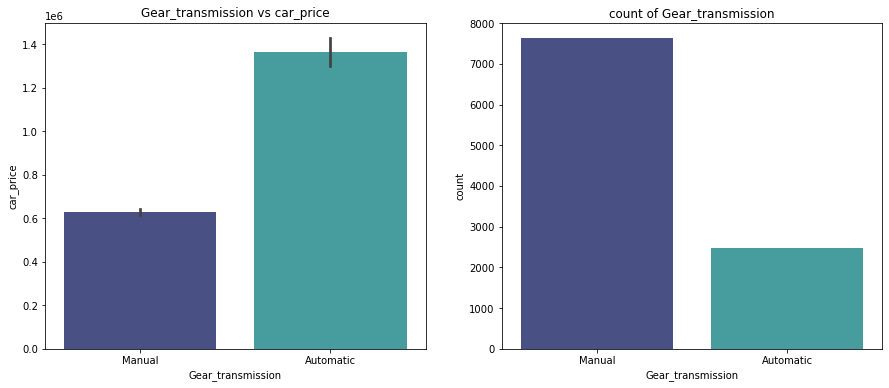

In [47]:
#check the relation between gear transmission and car price
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.barplot(x = 'Gear_transmission', y = 'car_price', data = df, palette="mako")
plt.title('Gear_transmission vs car_price')
plt.subplot(1,2,2)
sns.countplot(df['Gear_transmission'],palette='mako')
plt.title('count of Gear_transmission')
plt.show()

First plot is representing bar plot for Gear_transmission vs car_price, which will tell us that cars with manual gear transmission system are having less price compared to the cars which are with Automatic gear transmission.

The second graph is count plot of Gear_transmission, by which we can conclude that arround 70% of the cars are with Manual gear transmission system.

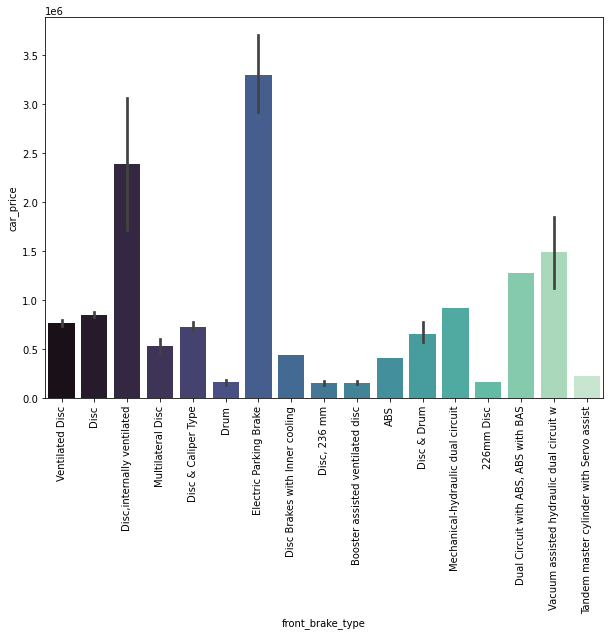

In [48]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'front_brake_type', y = 'car_price', data = df,palette='mako')
plt.xticks(rotation = 90)
plt.show()

Looking at the above bar plot for front_brake_type vs car_price we can say that the cars with Electric Parking Brake system for fron wheels are having higher prices than other type of braking system

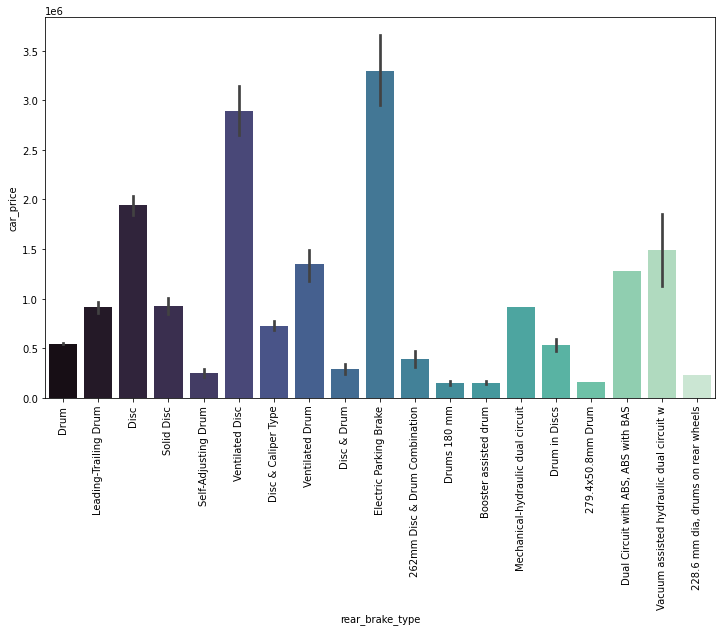

In [49]:
plt.figure(figsize = (12,7))
sns.barplot(x = 'rear_brake_type', y = 'car_price', data = df,palette='mako')
plt.xticks(rotation = 90)
plt.show()

The above graph is representing a barplot for rear_brake_type vs car_price which tells us that the cars having Electric parking brake or ventilated disc brake system are having higher prices than the cars with other type of braking system at rear side.

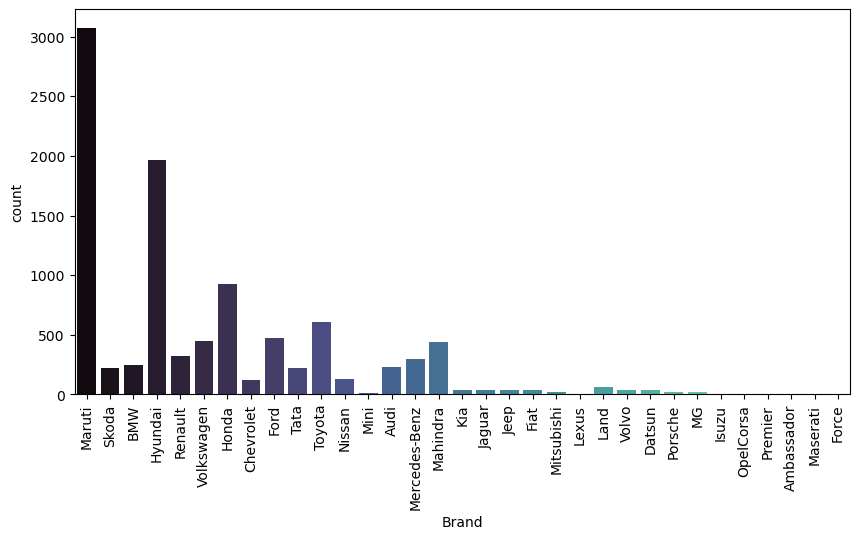

In [104]:
plt.figure(figsize = (10,5))
sns.countplot(df.Brand, palette="mako")
plt.xticks(rotation = 90)
plt.show()

The above count plot is for car brand; looking at this plot we can conclude that we are having most of the cars from Maruti and Hyundai brand.

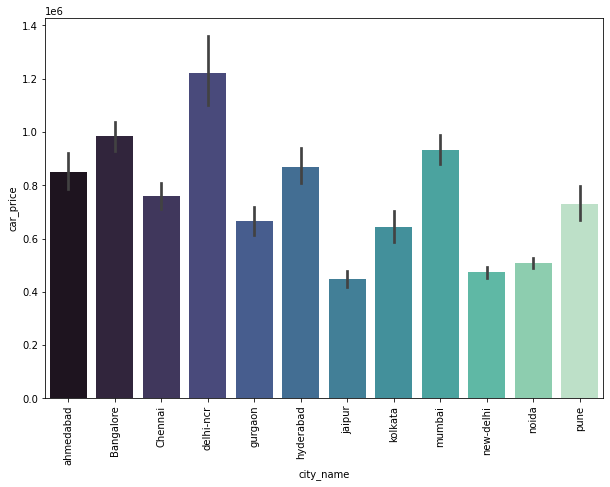

In [51]:
#lets check the car_price based on city names
plt.figure(figsize = (10,7))
sns.barplot(x = 'city_name', y = 'car_price', data = df, palette='mako')
plt.xticks(rotation = 90)
plt.show()

By looking at the above bar plot we came to know that the cars from the city delhi-ncr having higher prices and the cars from the city Jaipur are cheaper than other cities.

In [52]:
col=['Fuel_type','Seating_cap','Car_age']

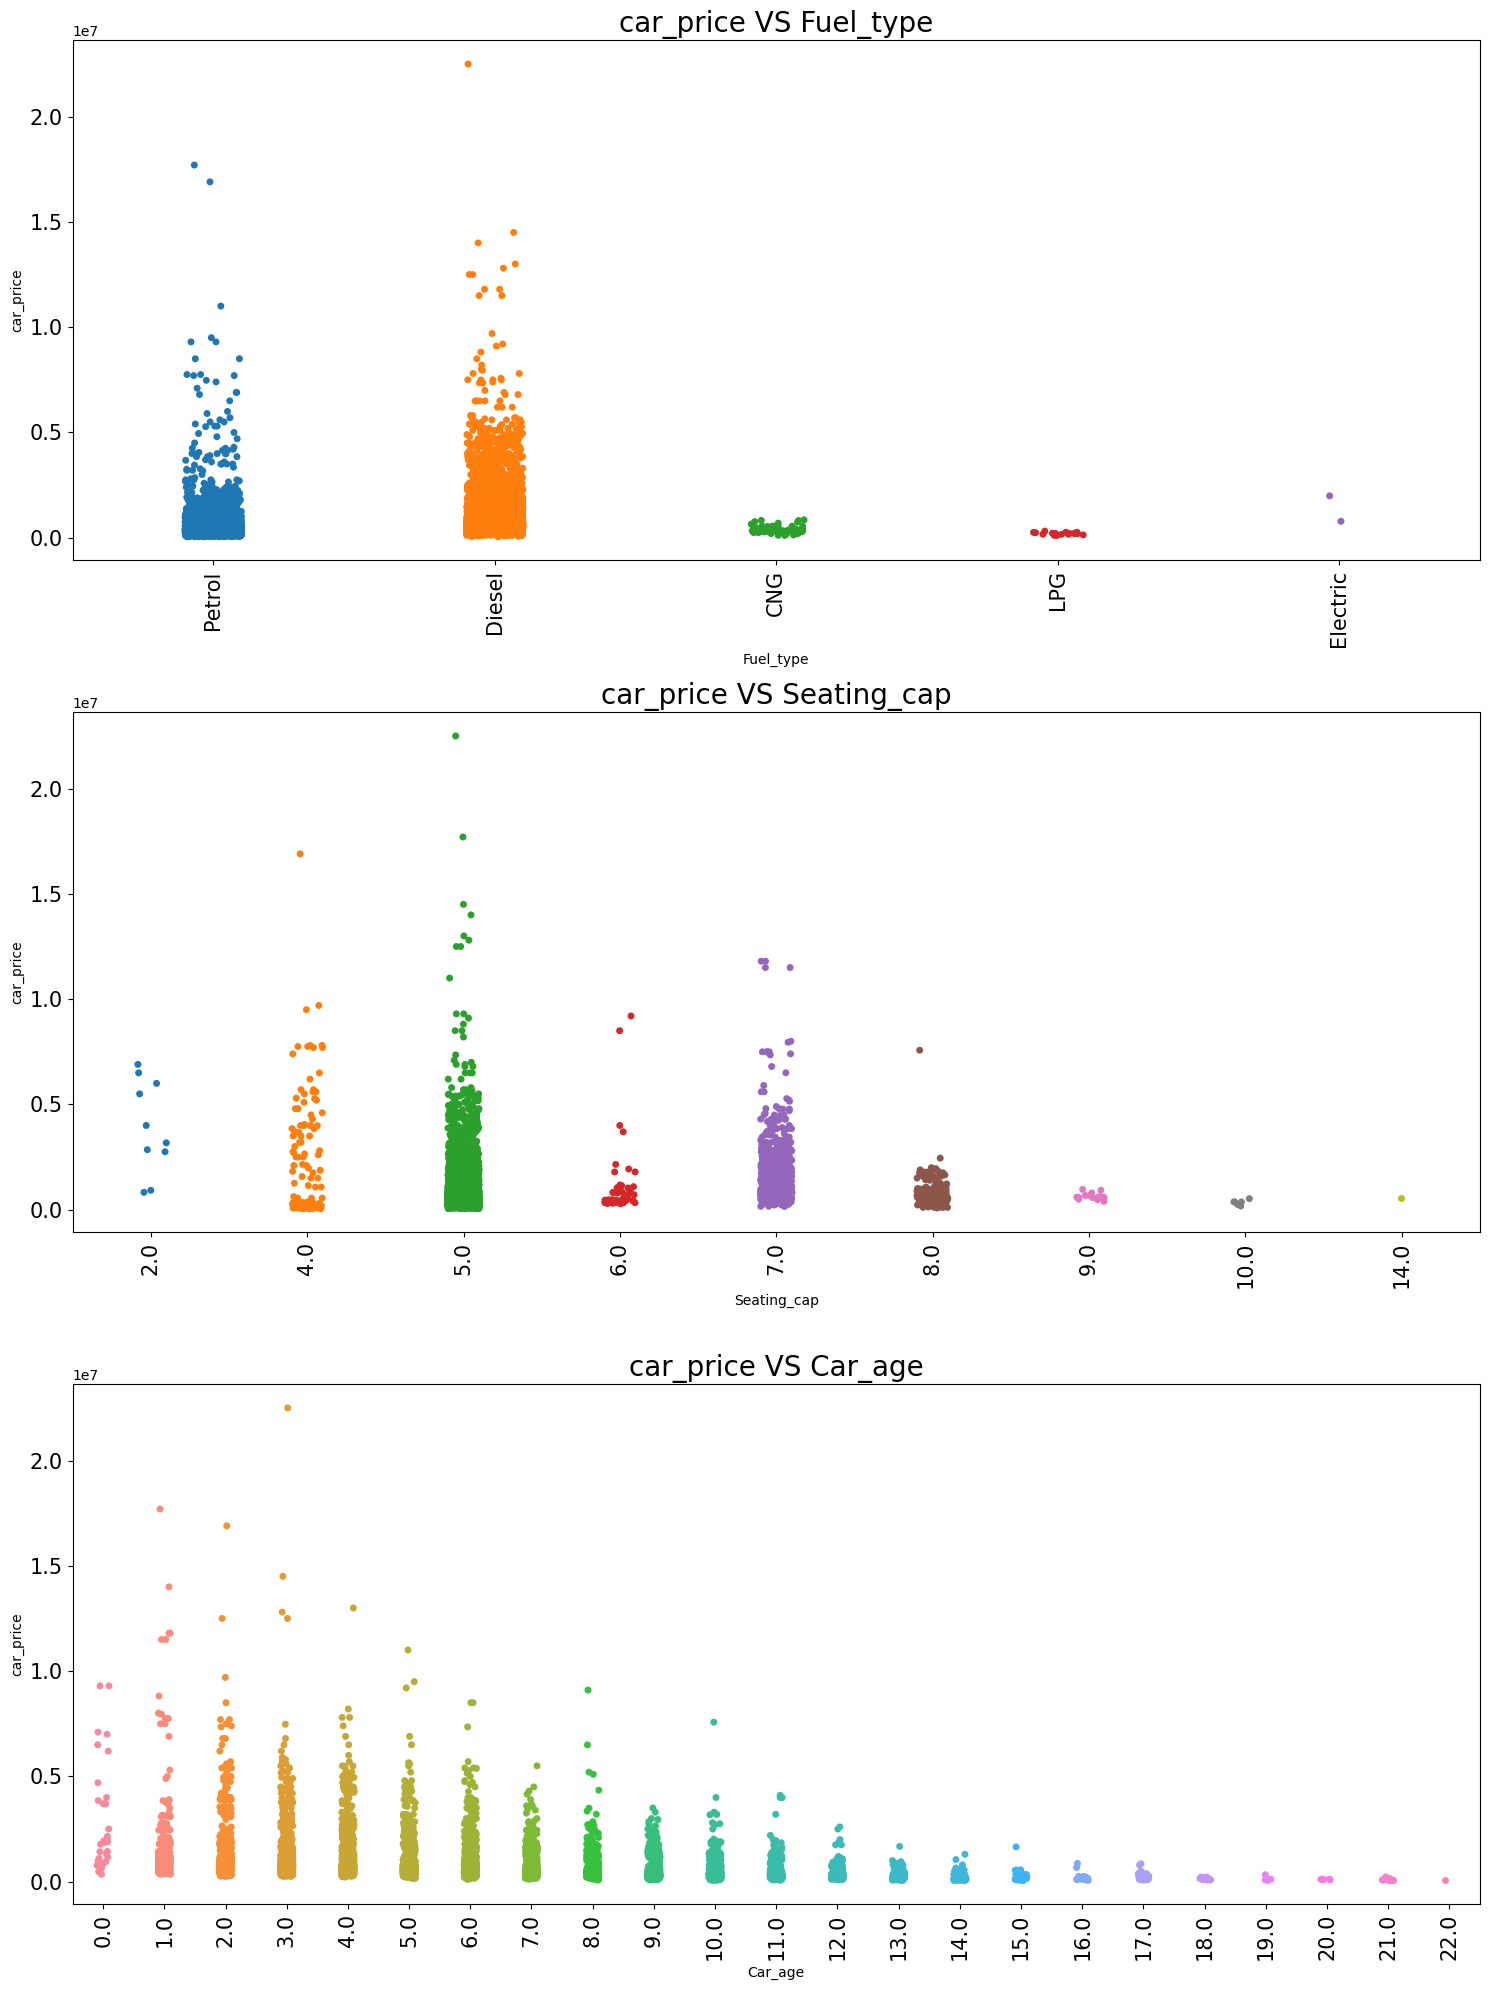

In [53]:
plt.style.use('default')
plt.figure(figsize=(15,20))
for i in range(len(col)):
    plt.subplot(3,1,i+1)
    sns.stripplot(y=df['car_price'],x=df[col[i]])
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()

## Observations
* More number of cars are using petrol and diesel as fuel; and these cars having wide range of price from minimum to maximum. Very few cars uses CNG, LPG, and Electricity as fuel type which are not much expensive when compared to that of the diesel and petrol cars.
* We can say that more number of cars having seating capacity of 5, 7 and 4 and these cars having higher prices than other cars as well. And only one car is observed with the seating capacity of 14.
* Looking at the graph for the car age we can conclude that the older cars are having very lower prices in market when compared to newer cars


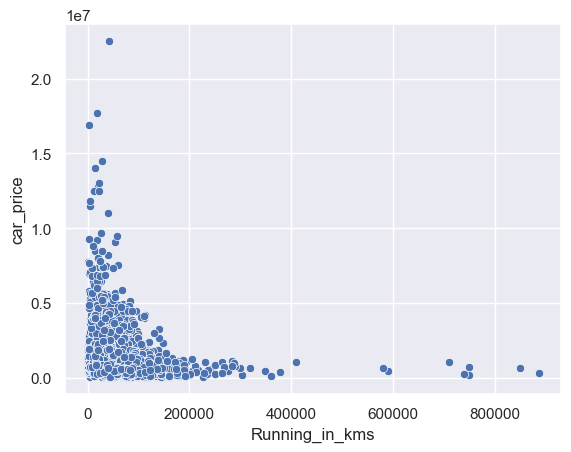

In [55]:
#lets check the car price based on car running 
sns.set_theme()
sns.scatterplot(x = 'Running_in_kms', y = 'car_price', data = df)
plt.show()

Looking at the above scatter plot we can say that the prices of cars are higher which are with less running.

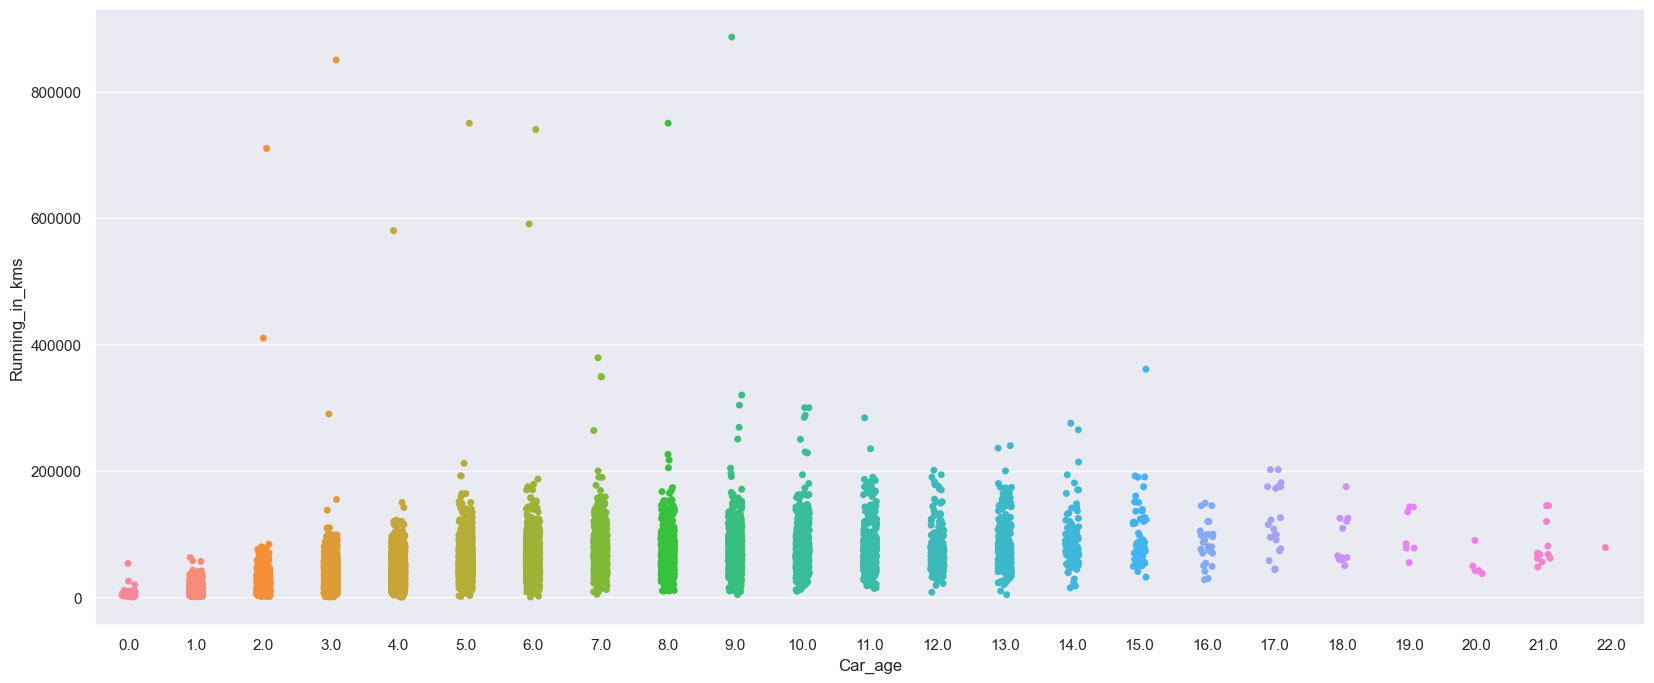

In [56]:
#check the relation between car age and running
plt.figure(figsize = (20,8))
sns.stripplot(x = 'Car_age', y = 'Running_in_kms', data = df)
plt.show()

I don't find any linear relation between car age and car running, however running kms increases from car age 0 to 7, after that the running is in the range of 0 to 40000km.

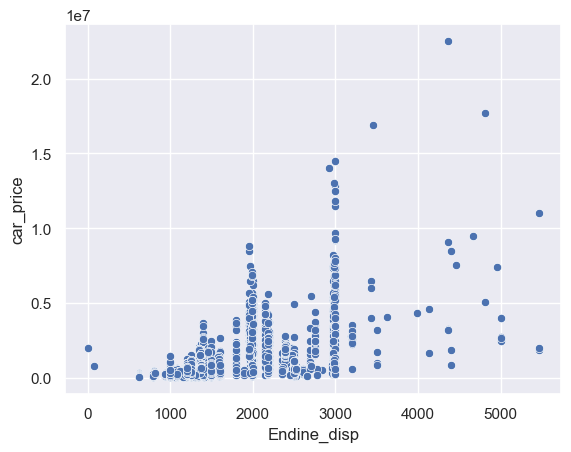

In [57]:
#car_price based on Engine Displacement
sns.scatterplot(x = 'Endine_disp', y = 'car_price', data = df)
plt.show()

Looking at this plot we can say that the as engine disp or engine cc increases the price of the car increases. And there are less number of cars which are having engine cc more than 3000.

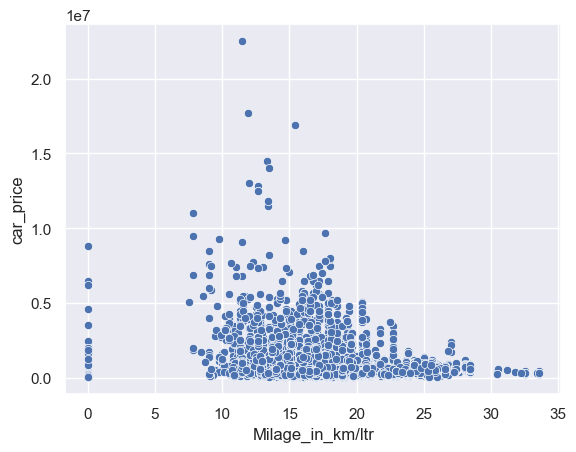

In [58]:
#lets check car_price based on Milage
sns.scatterplot(x = 'Milage_in_km/ltr', y = 'car_price', data = df)
plt.show()

We can see the car prices are higher some cars are with 0 milage, which is not realistic.
And the cars having milage in the range 8 to 20 km/ltr are having higher prices.

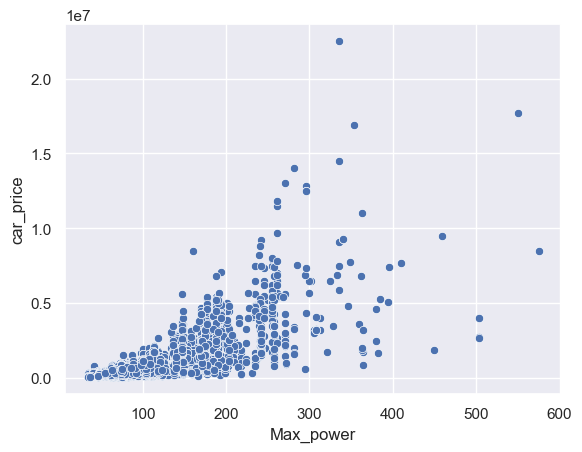

In [59]:
#car_price based on Max_power
sns.scatterplot(x = 'Max_power', y = 'car_price', data = df)
plt.show()

We can see as the maximum engine power increases the car prices goes on increasing.

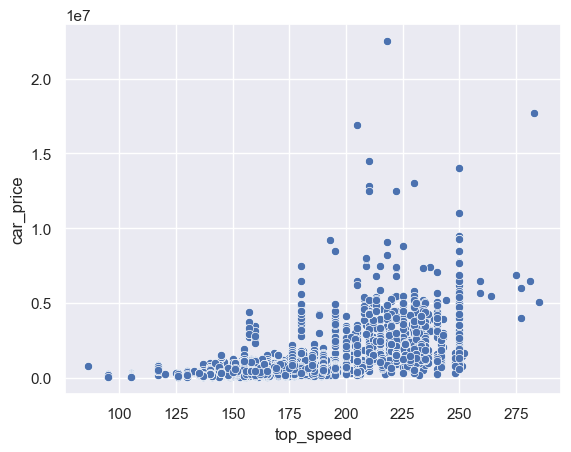

In [60]:
sns.scatterplot(x = 'top_speed', y = 'car_price', data = df)
plt.show()

We can see very less number of cars having top speed below 100km/hr. And we can see as the top_speed increases the car price also increases.

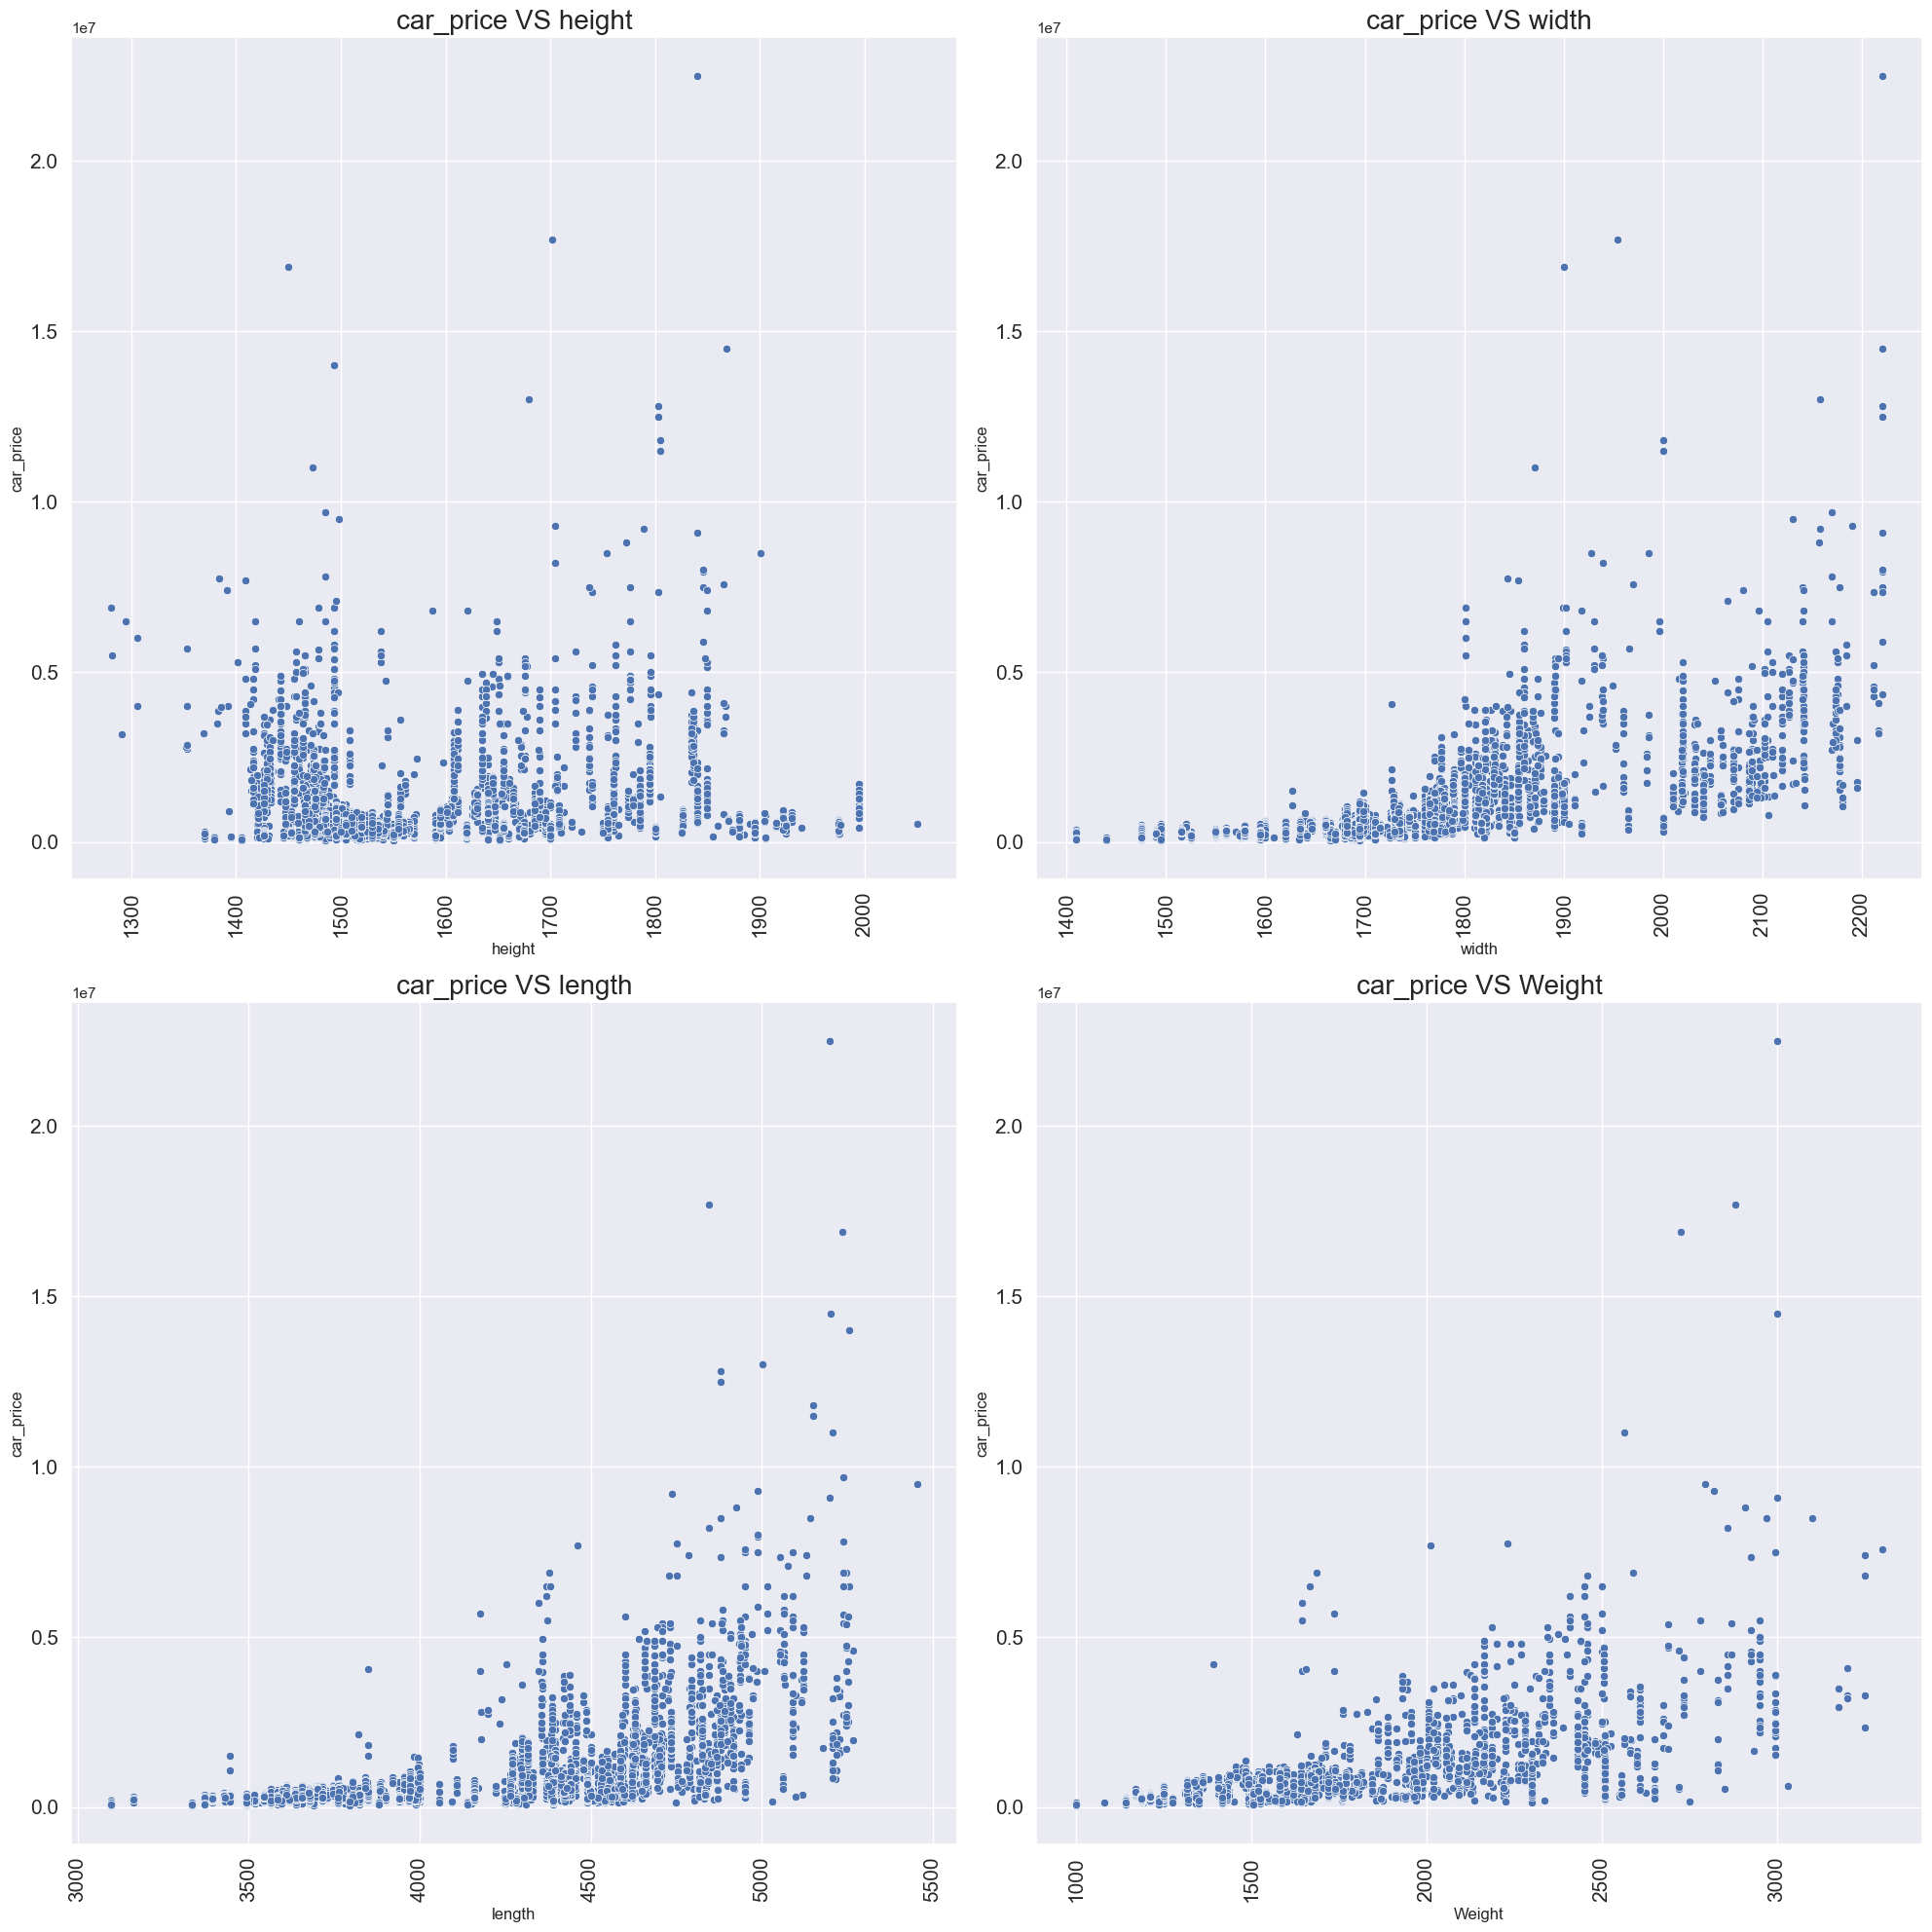

In [61]:
col=['height','width','length','Weight']
plt.figure(figsize=(20,20))
for i in range(len(col)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(y=df['car_price'],x=df[col[i]])
    plt.title(f"car_price VS {col[i]}",fontsize=20)
    plt.xticks(rotation = 90)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.tight_layout()

By looking at these above scatter plots we can say that car_price is not much strongly related to height of the car, but there is some linear relation between car_price and length, width, Weight of the car.

### color

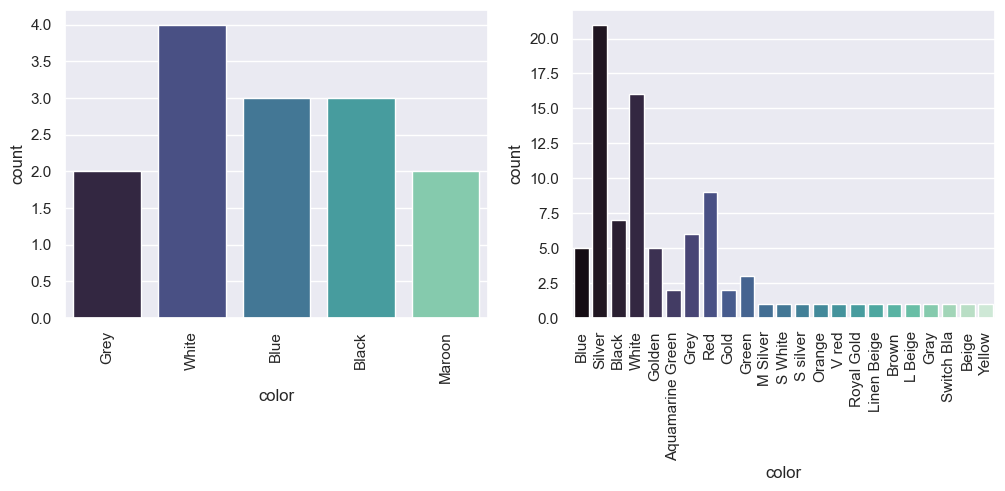

In [62]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.countplot(x = 'color', data = df.loc[df['car_price']>= 10000000], palette='mako')
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = 'color', data = df.loc[df['car_price']<= 100000], palette='mako')
plt.xticks(rotation = 90)
plt.show()

Here the first count is for the car color vs car_price for the car prices more than 1Cr. looking at this plot we came to know the colors of expensive cars.

And the second plot is for the cars which are with car_price below 1 lakh. Looking at this plot We can say that there are more number of cars with silver color with lower price.

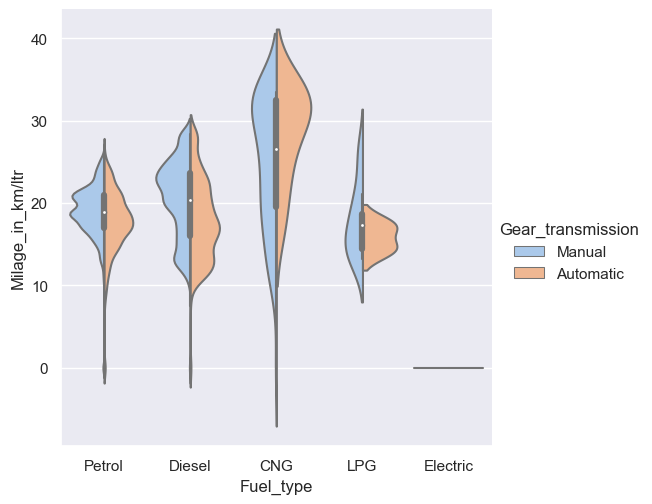

In [63]:
#lets check the relation between fuel_type, Gear_transmission and Mileage 
sns.catplot(x="Fuel_type", y="Milage_in_km/ltr", hue="Gear_transmission",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

We can clearly see that the cars using CNG are having good mileage compared to other fuels.

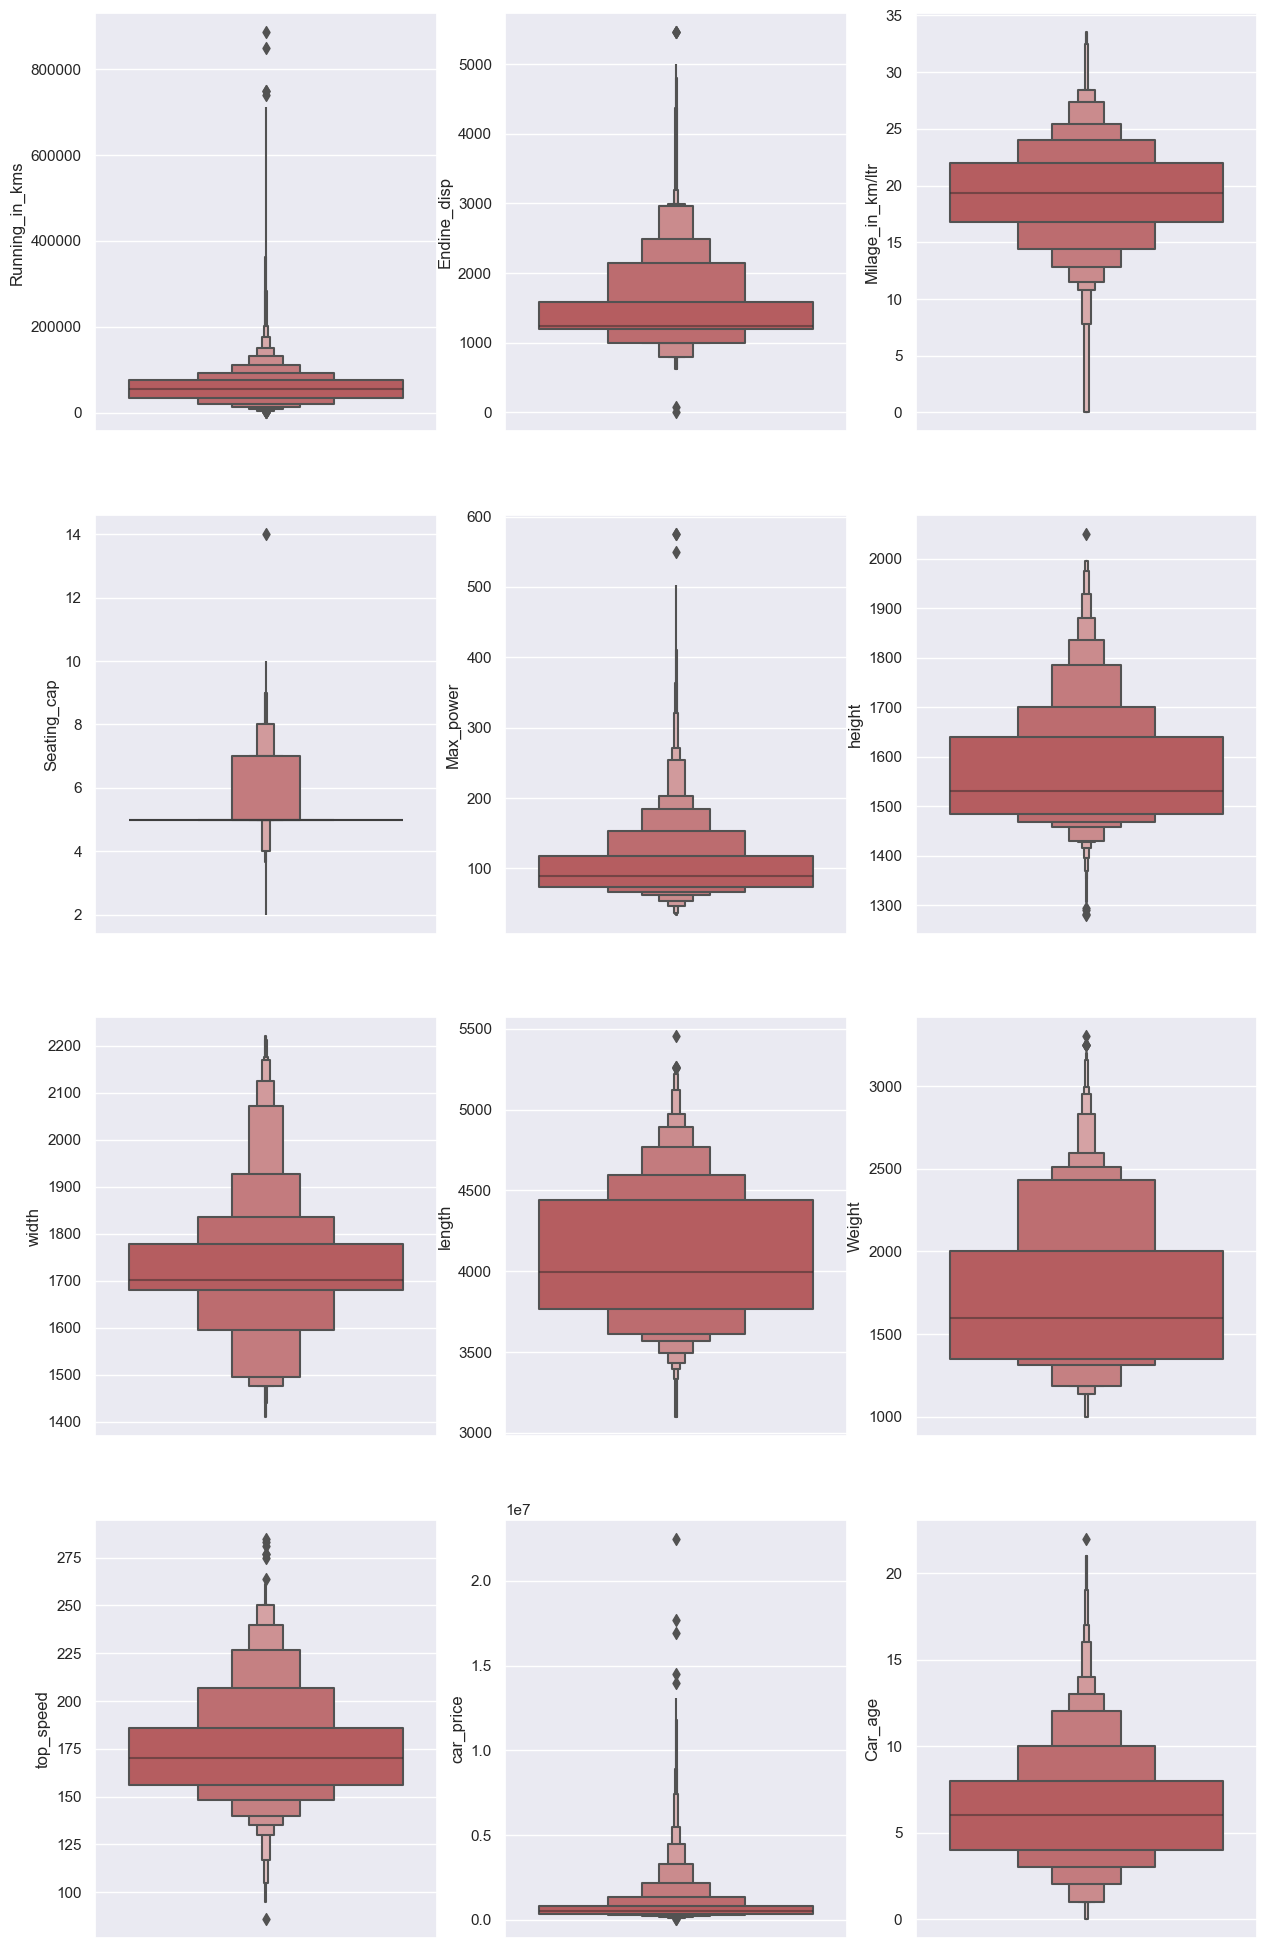

In [64]:
#lets check outliers using boxen plots
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(15,25))
pltnumber = 0
num = df._get_numeric_data()
ax = ax.flatten()
for col in num.columns:
    sns.boxenplot(y=col, data=df, ax=ax[pltnumber], color="r")
    pltnumber += 1
plt.show()

Looking at above plots we can say that there are many columns with outliers

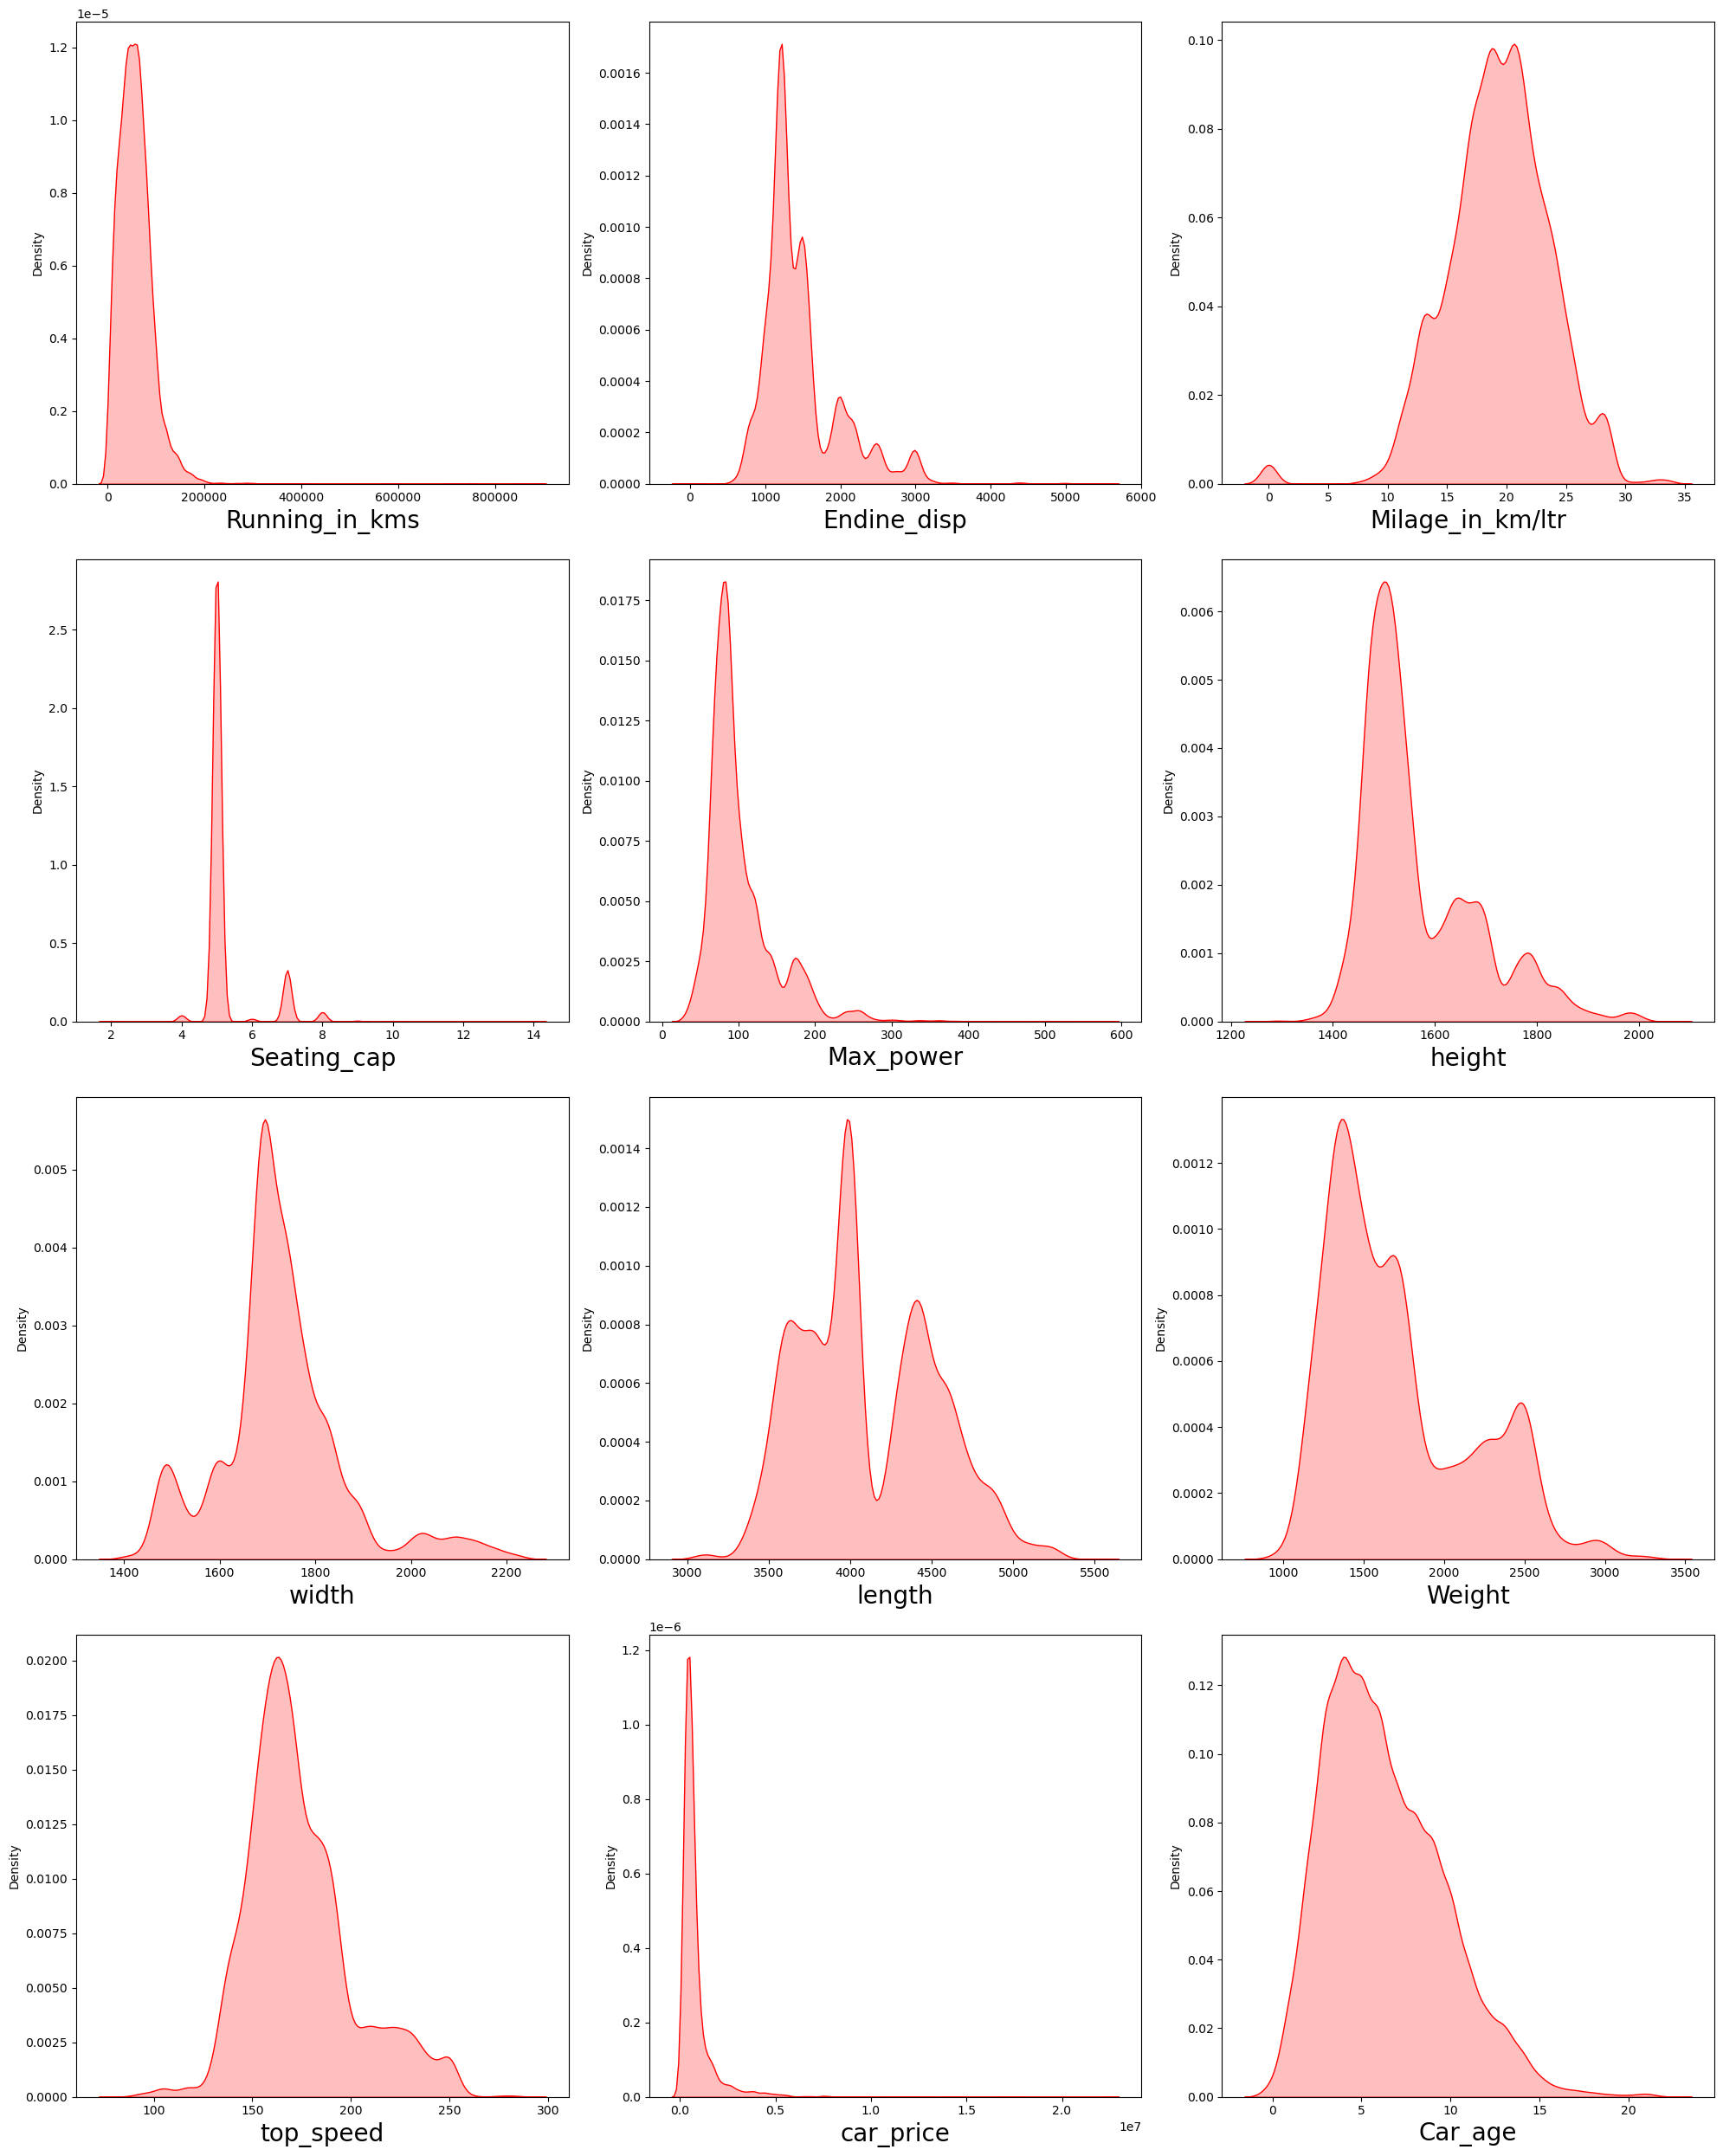

In [65]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

## Heat-map to check correlation

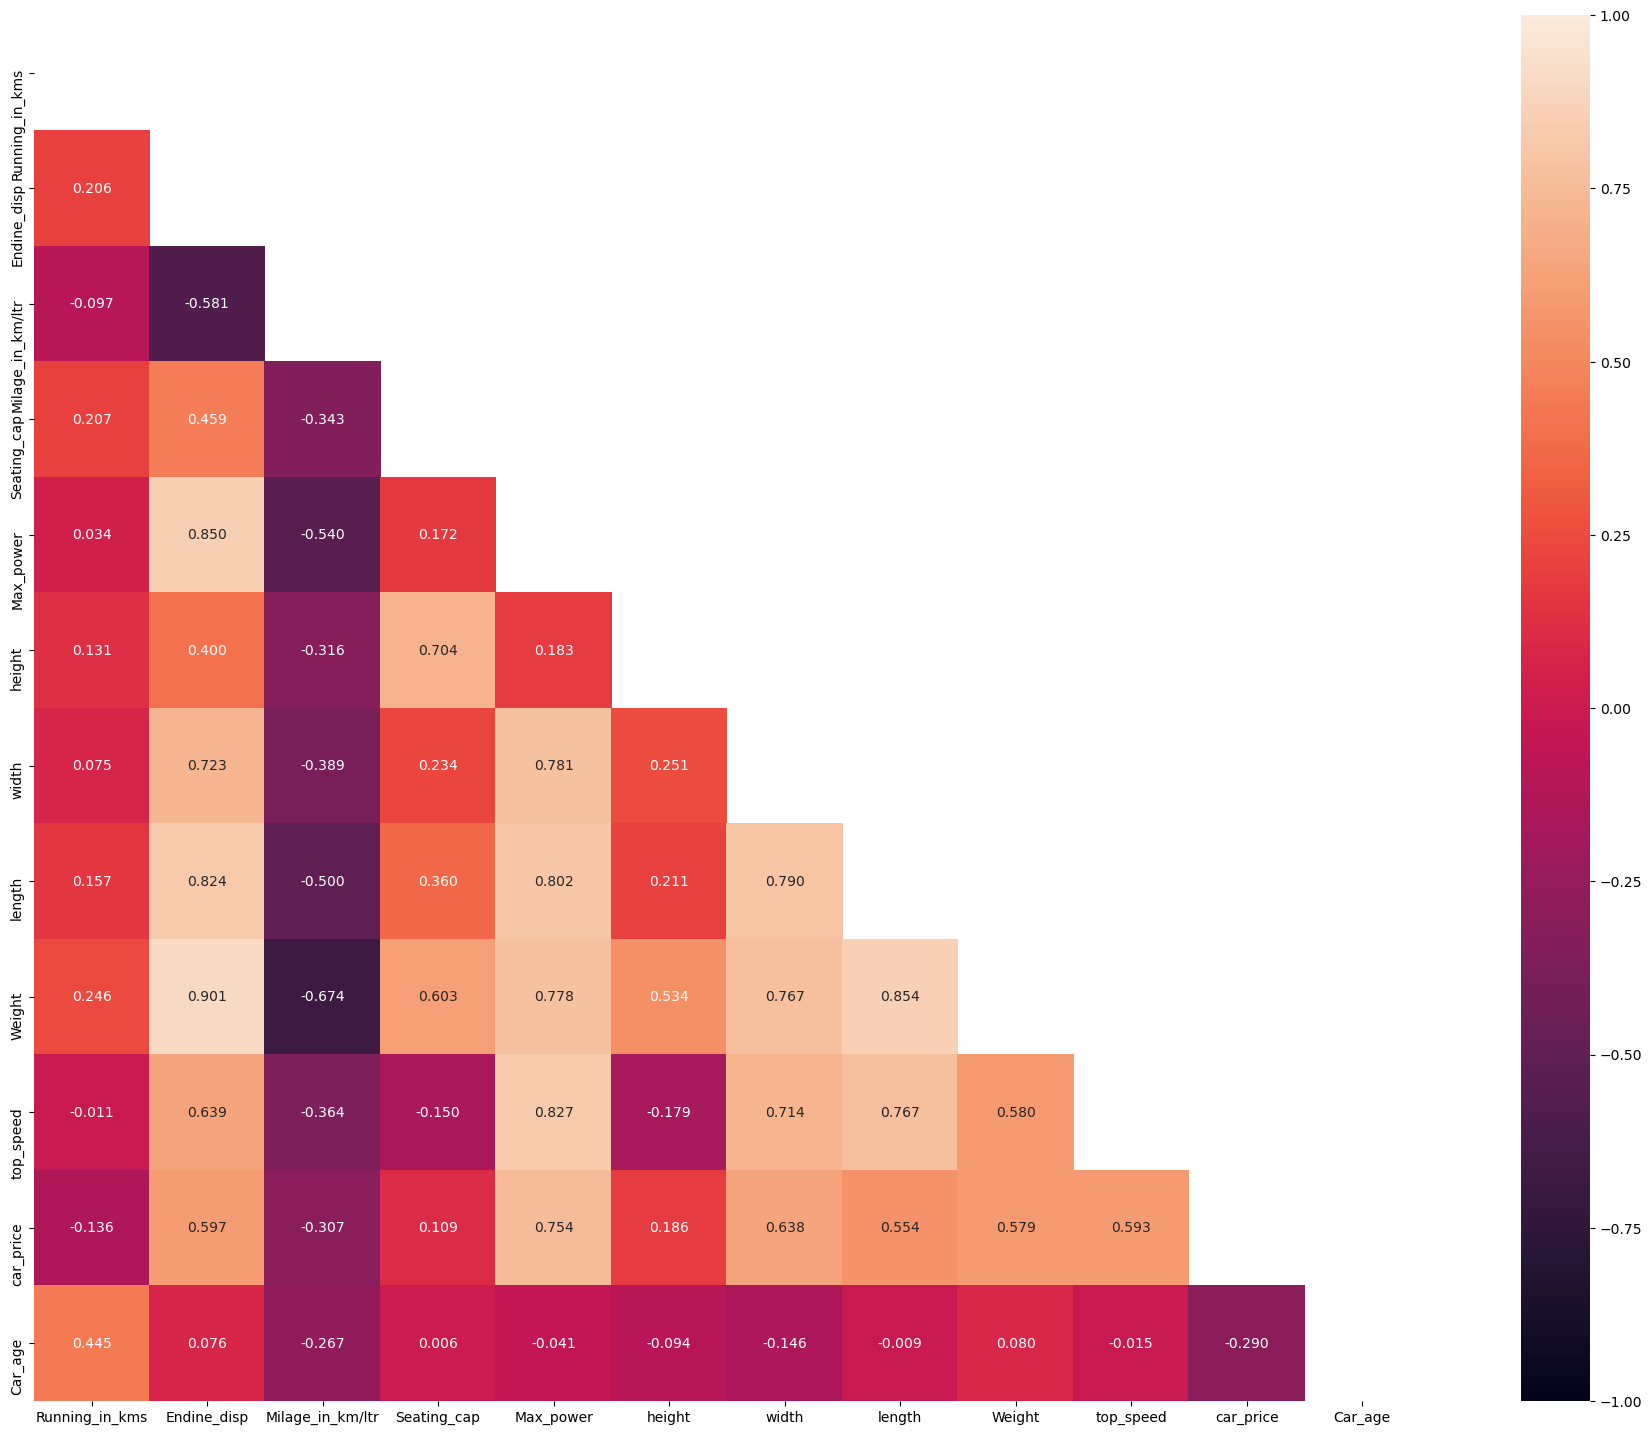

In [66]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':10},mask=upper_triangle)
plt.show()

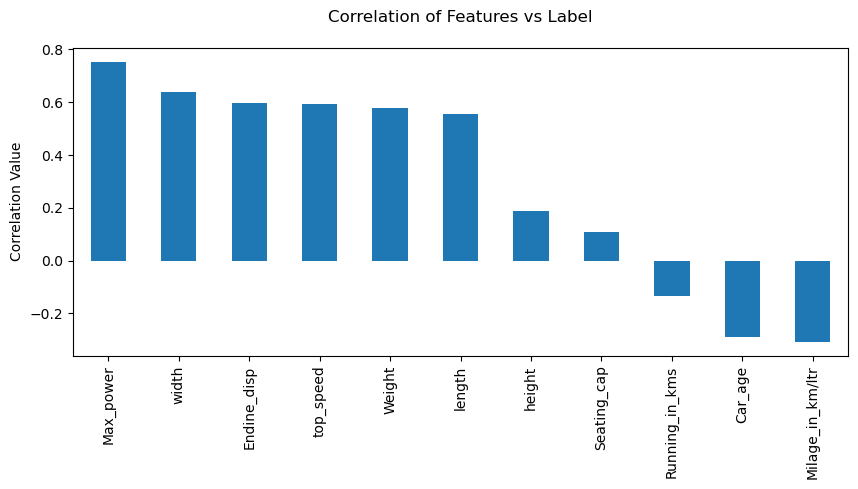

In [67]:
df_corr = df.corr()
plt.figure(figsize=(10,4))
df_corr['car_price'].sort_values( ascending = False).drop('car_price').plot.bar()
plt.title("Correlation of Features vs Label\n")
plt.ylabel("Correlation Value")
plt.show()

The above correlation heat-map will tell us that all the features are in good relation with our target variable. Among all these features Max_power and car width are having higher correlation with the target variable.

Other features like Engine_disp, length, weight and top_speed are showing nearly equal relation with target variable.

columns Running_in_kms, car_age and milage_in_kms are negatively related with target variable.

It seems like the column Engine_disp and Weight are having maximum coefficient of correlation between each other.

## Filling Missing values

I will replace null values from continuous columns with the means of that particular column and missing values from categorical columns will be replaced by mode of that particular column

In [68]:
for col in ['Endine_disp','Milage_in_km/ltr','Max_power','height','width','length','Weight','top_speed']:
    df[col] = df[col].fillna(df[col].mean())
for col1 in ['Seating_cap','front_brake_type','rear_brake_type']:
    df[col1] = df[col1].fillna(df[col1].mode()[0])

<AxesSubplot:>

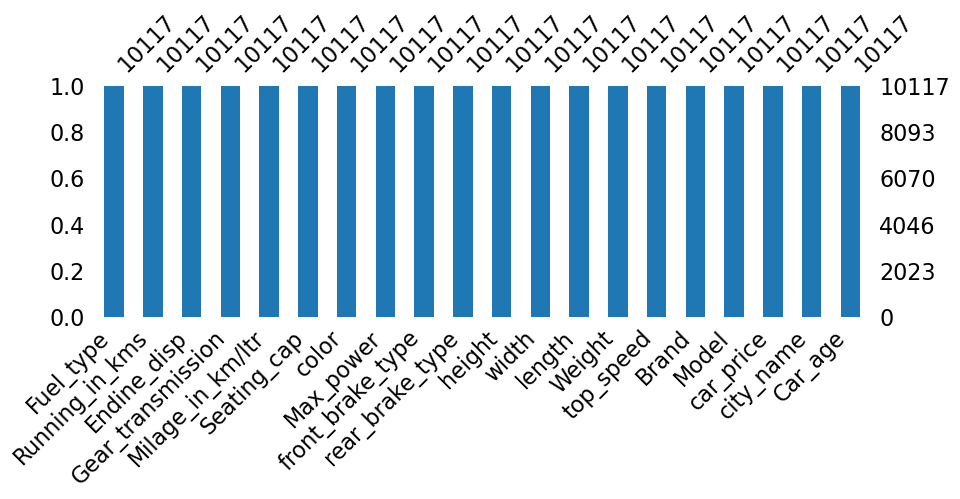

In [69]:
missingno.bar(df, figsize = (10,3), color="tab:blue")

Looking at the above figure we can see that we have successfully replaced all of the missing values with suitable value.

## Treating Outliers

I tried to remove outliers using z-score and IQR technique but by those methods we will lose huge amount data. So I decided to replace our outliers using percentile method.

In [70]:
for col in ['Running_in_kms','Endine_disp','Milage_in_km/ltr','Max_power','height','width','length','Weight','top_speed']:
    percentile = df[col].quantile([0.01,0.98]).values
    df[col][df[col]<=percentile[0]]=percentile[0]
    df[col][df[col]>=percentile[1]]=percentile[1]

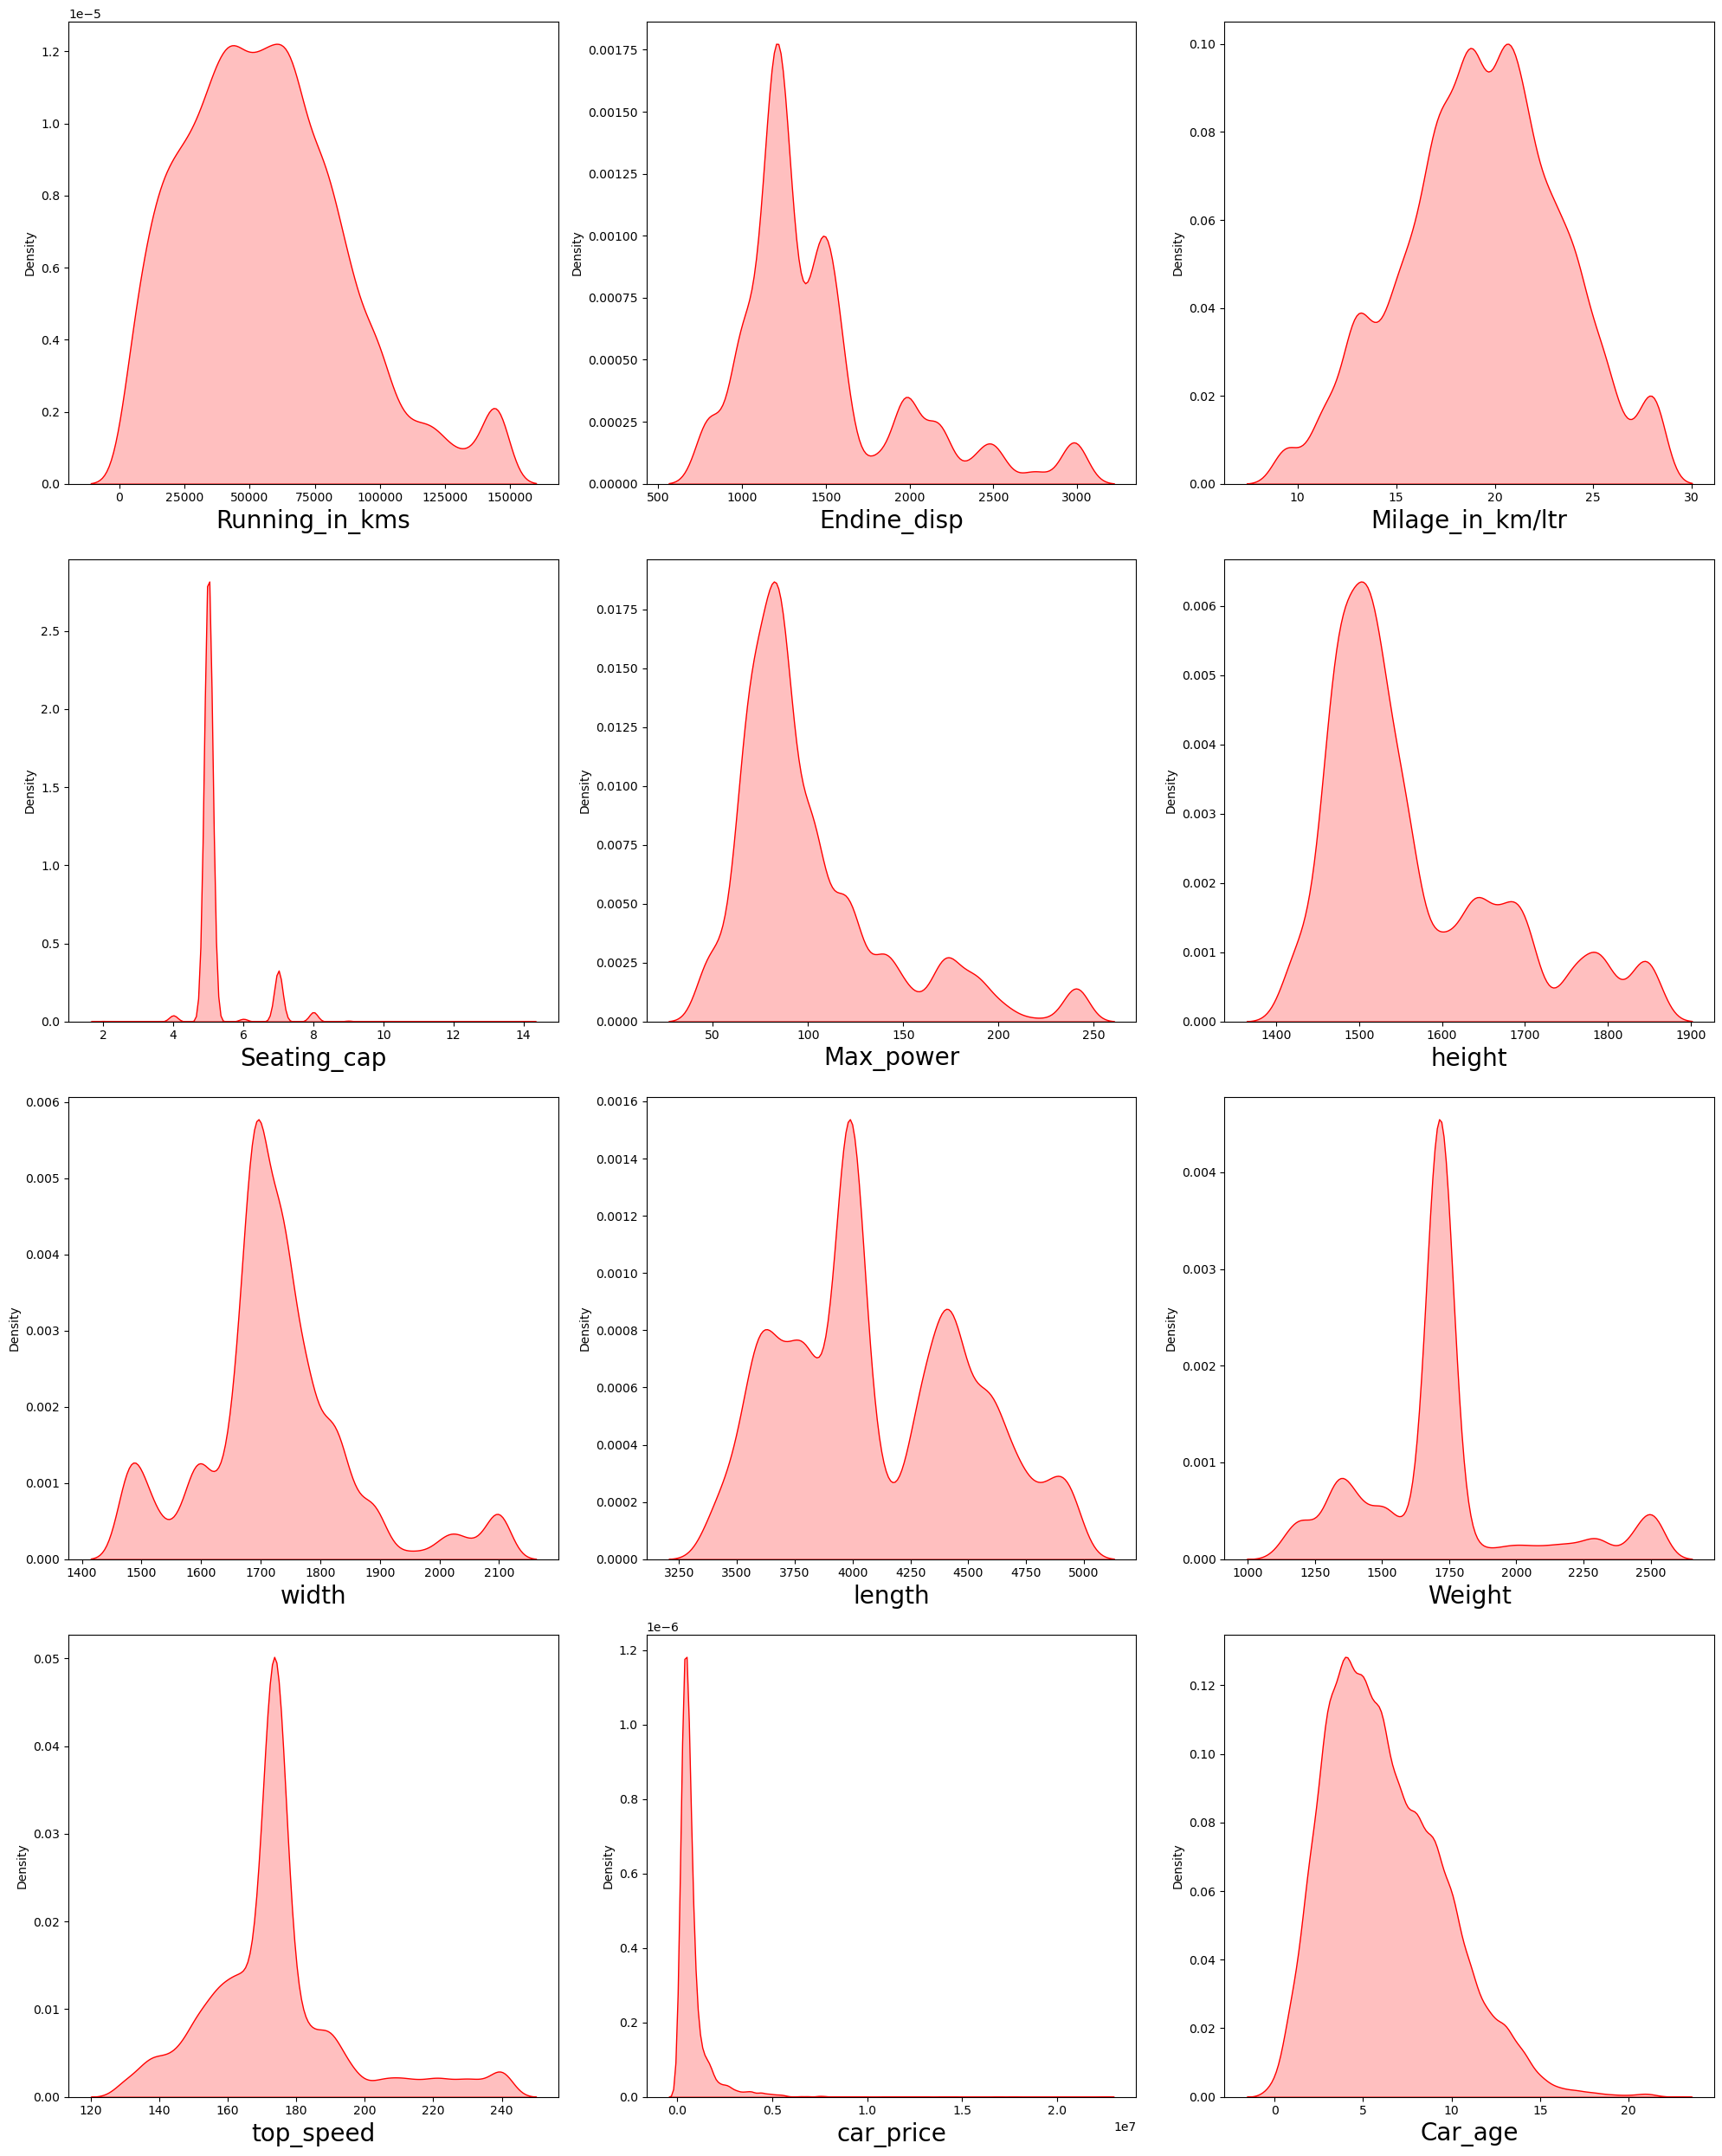

In [71]:
#lets check distribution after treating outliers
num_data = df._get_numeric_data()
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Great now we can see our data is in good range because outliers have been replaced by percentile method

In [72]:
df.describe()

,Running_in_kms,Endine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,car_price,Car_age
count,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,10117.000000,1.011700e+04,10117.000000
mean,56573.613514,1467.683891,19.330375,5.249382,101.331249,1566.955676,1723.581642,4106.076108,1710.150396,173.842854,8.106850e+05,6.290402
std,31680.565208,493.428142,4.032545,0.750630,40.923875,108.363871,126.641580,398.890706,303.633887,21.031421,1.033043e+06,3.316786
min,3990.960000,796.000000,9.332000,2.000000,46.300000,1416.000000,1475.000000,3395.000000,1140.000000,130.000000,4.500000e+04,0.000000
25%,33000.000000,1197.000000,16.800000,5.000000,74.000000,1485.000000,1680.000000,3775.000000,1580.000000,163.000000,3.500000e+05,4.000000
50%,54000.000000,1248.000000,19.340000,5.000000,88.500000,1530.000000,1710.000000,3995.000000,1715.181038,173.848290,5.350000e+05,6.000000
75%,75461.000000,1582.000000,22.000000,5.000000,117.300000,1640.000000,1775.000000,4430.000000,1715.181038,176.000000,8.140000e+05,8.000000
max,145000.000000,2987.000000,28.090000,14.000000,241.204000,1850.000000,2102.000000,4940.000000,2510.000000,240.000000,2.250000e+07,22.000000


As we know that our data is sequencially arranged by the city names, I will shuffle the data set for better results while doing cross validation

In [73]:
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [74]:
#lets check the data after shuffling it
df

,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,height,width,length,Weight,top_speed,Brand,Model,car_price,city_name,Car_age
0,Diesel,106234.0,1248.0,Manual,19.30,5.0,White,73.90,Ventilated Disc,Drum,1530.0,1690.0,4160.0,1715.181038,173.84829,Maruti,Swift Dzire,220000.0,jaipur,13.0
1,Diesel,83000.0,1498.0,Manual,21.14,5.0,Beige,103.52,Disc,Drum,1466.0,1699.0,4386.0,1760.000000,183.00000,Skoda,Rapid,550000.0,mumbai,6.0
2,Diesel,22000.0,1995.0,Automatic,20.68,5.0,Blue,188.00,Disc,Disc,1612.0,1821.0,4439.0,1715.181038,222.00000,BMW,X1,2750000.0,delhi-ncr,3.0
3,Petrol,38270.0,1197.0,Manual,20.36,5.0,Red,78.90,Ventilated Disc,Drum,1550.0,1595.0,3585.0,1715.181038,173.84829,Hyundai,Grand i10,251000.0,noida,10.0
4,Diesel,45000.0,1248.0,Manual,23.40,5.0,Silver,74.00,Ventilated Disc,Drum,1555.0,1695.0,3995.0,1505.000000,162.00000,Maruti,Swift Dzire,380000.0,kolkata,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10112,Petrol,18740.0,1197.0,Manual,18.90,5.0,White,82.00,Disc,Drum,1520.0,1660.0,3765.0,1715.181038,165.00000,Hyundai,Grand i10,526000.0,Bangalore,5.0
10113,Petrol,31800.0,796.0,Manual,22.74,5.0,Silver,47.30,Disc,Drum,1475.0,1490.0,3395.0,1185.000000,140.00000,Maruti,Alto 800,345000.0,Bangalore,5.0
10114,Diesel,34000.0,1248.0,Manual,24.30,5.0,Grey,88.50,Ventilated Disc,Drum,1640.0,1790.0,3995.0,1680.000000,172.00000,Maruti,Vitara Brezza,860000.0,ahmedabad,2.0
10115,Petrol,77289.0,796.0,Manual,24.70,5.0,White,47.30,Disc,Drum,1475.0,1490.0,3445.0,1185.000000,140.00000,Maruti,Alto 800,219000.0,gurgaon,6.0


## Dividing the data into features and label as x and y respectively

In [75]:
#lets saperate data into label and features
x = df.drop(columns = 'car_price')
y = df["car_price"]

In [76]:
#checking the skewness
x.skew()

Running_in_kms      0.650816
Endine_disp         1.387098
Milage_in_km/ltr   -0.087228
Seating_cap         2.465354
Max_power           1.517460
height              1.065351
width               0.668475
length              0.278479
Weight              0.919161
top_speed           1.042618
Car_age             0.735924
dtype: float64

In [77]:
#Lets treat the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [78]:
x.skew()

Running_in_kms     -0.887468
Endine_disp         0.649944
Milage_in_km/ltr   -0.087228
Seating_cap         1.874770
Max_power           0.649480
height              0.958739
width               0.340528
length              0.278479
Weight              0.285557
top_speed           0.537848
Car_age            -0.478671
dtype: float64

Now I will separate numerical amd categorical features for applying standardScaler to numerical data and encoding categorical features.

In [79]:
num_data = x.select_dtypes(include = [np.number])
cat_data = x.select_dtypes(exclude=[np.number])

## Scaling

In [80]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
num = scaler.fit_transform(num_data)
num = pd.DataFrame(num,columns=num_data.columns)

## Encoding

In [81]:
#lets apply ordinal encoder for categorical data
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in cat_data.columns:
    cat_data[i] = enc.fit_transform(cat_data[i].values.reshape(-1,1))

In [82]:
X = pd.concat([num, cat_data], axis = 1)

In [83]:
X

,Running_in_kms,Endine_disp,Milage_in_km/ltr,Seating_cap,Max_power,height,width,length,Weight,top_speed,Car_age,Fuel_type,Gear_transmission,color,front_brake_type,rear_brake_type,Brand,Model,city_name
0,1.219055,-0.378531,-0.007533,-0.321641,-0.700689,-0.322213,-0.235415,0.135191,0.104253,0.059438,1.565689,1.0,1.0,210.0,16.0,7.0,18.0,218.0,6.0
1,0.837608,0.228091,0.448777,-0.321641,0.248989,-0.960263,-0.162021,0.701791,0.254861,0.500082,0.142016,1.0,1.0,17.0,3.0,7.0,28.0,180.0,8.0
2,-1.073439,1.180132,0.334700,-0.321641,1.937218,0.457383,0.796252,0.834666,0.104253,2.160459,-1.007393,1.0,0.0,22.0,3.0,4.0,2.0,247.0,3.0
3,-0.305564,-0.517141,0.255341,-0.321641,-0.516519,-0.128284,-1.034863,-1.306378,0.104253,0.059438,1.070360,4.0,1.0,160.0,16.0,7.0,9.0,109.0,10.0
4,-0.073049,-0.378531,1.009245,-0.321641,-0.696887,-0.080193,-0.194593,-0.278476,-0.658965,-0.546620,0.658197,1.0,1.0,180.0,16.0,7.0,18.0,218.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10112,-1.288158,-0.517141,-0.106731,-0.321641,-0.408036,-0.420130,-0.482915,-0.855104,0.104253,-0.389098,-0.174598,4.0,1.0,210.0,3.0,7.0,9.0,109.0,0.0
10113,-0.567042,-1.872168,0.845569,-0.321641,-1.951032,-0.868874,-1.975810,-1.782722,-2.054437,-1.798928,-0.174598,4.0,1.0,180.0,3.0,7.0,18.0,25.0,0.0
10114,-0.473131,-0.378531,1.232440,-0.321641,-0.193154,0.714536,0.558978,-0.278476,-0.016749,-0.032350,-1.598271,1.0,1.0,85.0,16.0,7.0,18.0,240.0,2.0
10115,0.728958,-1.872168,1.331638,-0.321641,-1.951032,-0.868874,-1.975810,-1.657368,-2.054437,-1.798928,0.142016,4.0,1.0,210.0,3.0,7.0,18.0,25.0,4.0


### Check the distribution of car_price column

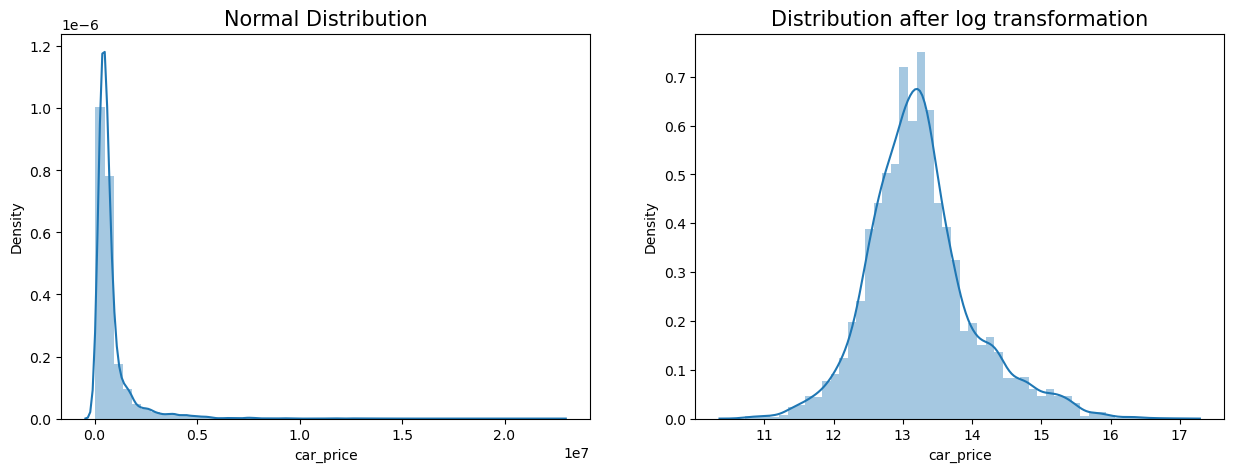

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Distribution after log transformation",fontsize=15)
sns.distplot(np.log(y))
plt.show()

As we can see our target variable is skewed much at right, so I will apply log to the y for getting good results.

## Finding best random_state

In [85]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8492910404176316 on Random State 1


### spliting the data into train and test parts

In [86]:
#lets split our train data into train and test part with our best random state
x_train, x_test, y_train, y_test = train_test_split(X, np.log(y),test_size = 0.25,random_state = r_state)

## Model Building with the Evaluation

In [87]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X, y, cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

### LinearRegression Model

MAE : 0.22654098350851157
RMSE : 0.3070059919211582
------------------------------
Training r2 Score : 84.90541575720596 %
Testing r2 Score: 83.50679526647684 %
------------------------------

Cross validation score : 53.707515946601944

Accuracy Score - Cross Validation Score : 29.7992793198749


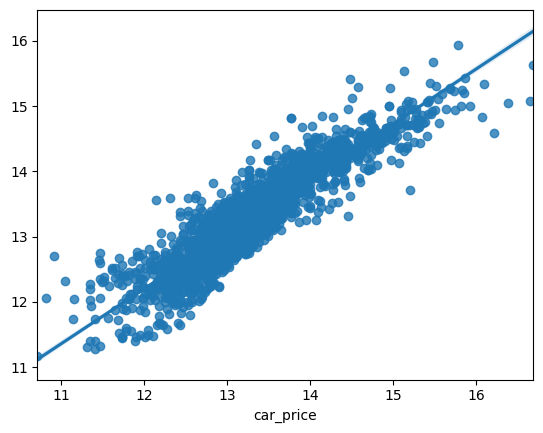

In [88]:
lr = LinearRegression()
BuiltModel(lr)

### DecisionTreeRegressor

MAE : 0.14232169189397884
RMSE : 0.22791130076762967
------------------------------
Training r2 Score : 99.99886775480535 %
Testing r2 Score: 90.91043570480151 %
------------------------------

Cross validation score : 76.74886563488607

Accuracy Score - Cross Validation Score : 14.161570069915442


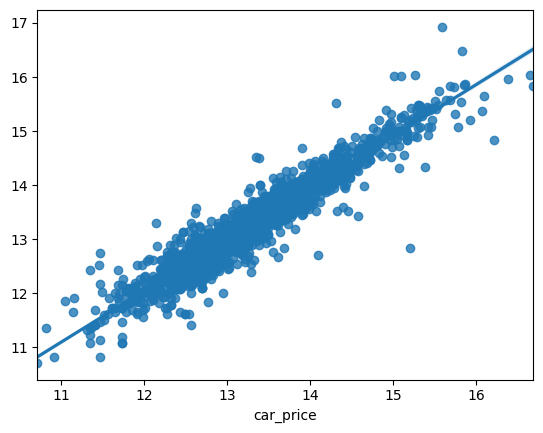

In [89]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
BuiltModel(dt)

### RandomForestRegressor

MAE : 0.10811241739683104
RMSE : 0.16380827683520305
------------------------------
Training r2 Score : 99.31608418392705 %
Testing r2 Score: 95.30448718634715 %
------------------------------

Cross validation score : 90.07286478088338

Accuracy Score - Cross Validation Score : 5.231622405463767


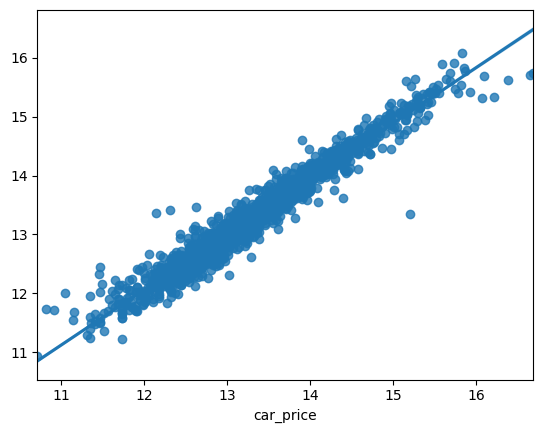

In [90]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
BuiltModel(rf)

### XGBRegressor

MAE : 0.09958806202685498
RMSE : 0.14434012309410027
------------------------------
Training r2 Score : 99.15450107721539 %
Testing r2 Score: 96.35426171404487 %
------------------------------

Cross validation score : 90.69657420153456

Accuracy Score - Cross Validation Score : 5.657687512510307


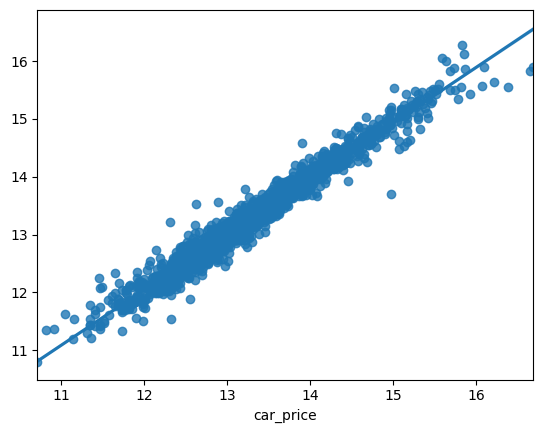

In [91]:
from xgboost import XGBRegressor
xgb = XGBRegressor(verbosity = 0)
BuiltModel(xgb)

### ExtraTreesRegressor

MAE : 0.10517512324341258
RMSE : 0.1608953504149118
------------------------------
Training r2 Score : 99.99886775480535 %
Testing r2 Score: 95.4699986202277 %
------------------------------

Cross validation score : 91.80259477847399

Accuracy Score - Cross Validation Score : 3.6674038417537105


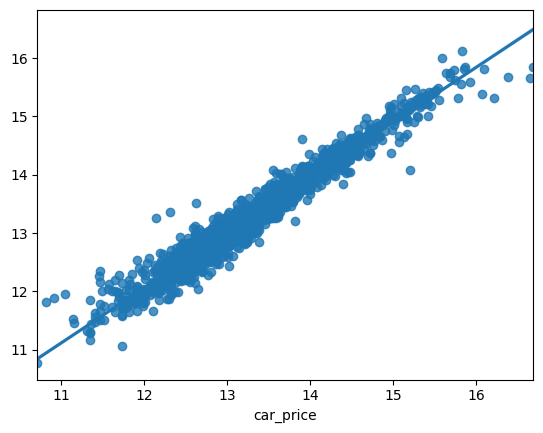

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
BuiltModel(ext)

### LGBMRegressor

MAE : 0.10296190374100743
RMSE : 0.14352363849757785
------------------------------
Training r2 Score : 97.79571650438243 %
Testing r2 Score: 96.39539054245539 %
------------------------------

Cross validation score : 90.48457776577358

Accuracy Score - Cross Validation Score : 5.910812776681809


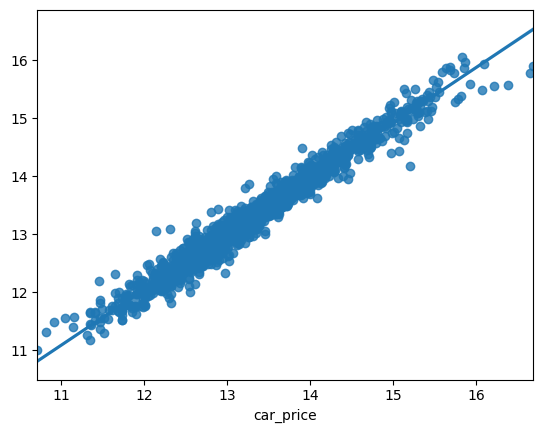

In [93]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
BuiltModel(lgbm)

Among all the algorithms which I have used and tested for this data set, ExtraTreeRegressor is giving least difference in r2-score and CV-score, with lower rmse and mae. So I am selecting this algorithm as best suitable algorithm for our final model.

## Hyperparameter Tuning

In [94]:
#lets selects different parameters for tuning
grid_params = {
                'max_depth': [8,9,10,12],
                'n_estimators':[500,700,900,1000],
                'min_samples_split': [2]
                }

In [95]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(ExtraTreesRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [8, 9, 10, 12], 'min_samples_split': [2],
                         'n_estimators': [500, 700, 900, 1000]})

In [96]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 1000}

## Final Model

In [97]:
#lets train and test our final model with best parameters
model = ExtraTreesRegressor(max_depth = 12, min_samples_split = 2, n_estimators = 1000)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.12201226062044432
RMSE : 0.1713212913718699
------------------------------
 
r2 Score: 94.86389344620623 %


Great After doing hyperparameter finally We are getting good r2 score for our final model with satisfactory mae and rmse.

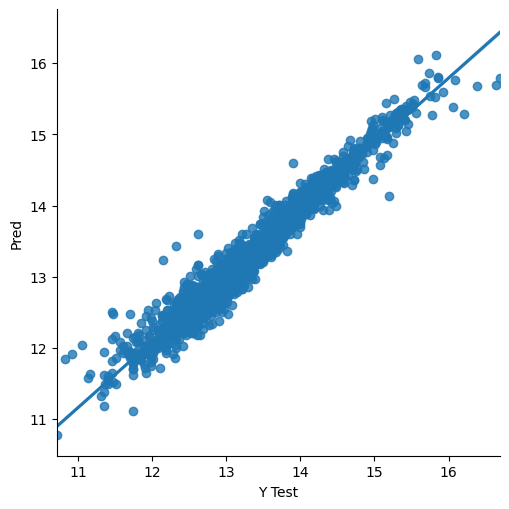

In [98]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

## Model Saving

In [99]:
import joblib
joblib.dump(model,"UsedCar_price_prediction.pkl")

['UsedCar_price_prediction.pkl']

## Loading the model

In [100]:
model=joblib.load('UsedCar_price_prediction.pkl')

In [101]:
pred=model.predict(x_test)

In [102]:
np.exp(pred)

array([ 492919.55692884, 1567014.84128834,  148559.44774502, ...,
       1126057.74198576,  410156.54781222,  497229.40341518])

These are our predicted prices with the final model.